# Dihydrofolate Reductase (DHFR) Inhibitors Classification


## Binary Activity Classifier

This Jupyter notebook takes quantitative structure-activity relationship (QSAR) data for a compiled set of dihydrofolate reductase (DHFR) inhibitors to construct a binary classifier to predict active/inactive compounds.

## Dataset

https://www.kaggle.com/shashwatwork/dihydrofolate-reductase-inhibitors-data-dhfr

## Motivation

Early phase drug discovery involves the identification of compounds with therapeutic potential for development (hit discovery). Such candidates must engage the biological target with reasonable selectivity and possess favourable physicochemical properties such as solubility, cell permeability, and metabolic stability. A traditional early discovery phase protocol involves high-throughput screening (HTC) of compound libraries and determining their corresponding affinities via biological assays. While this can be effective, a notable limitation is the arduous task of conducting experiments for an enormous number of compounds which is expensive and slow. With the advent of computational power and sufficiently accurate physics-based models, computer (in silico) simulation and calculations are often used to supplement experimental assays. These calculations may incorporate multiple facets of compound binding, including the compound polarity, atomic bond lengths, atomic angles, etc. and collectively constitute QSAR data. Modern hit discovery utilizes this quantitative data to drive hypotheses and steer experimental efforts towards compounds which are most promising, thus enhancing drug discovery. 

Suppose you are given a dataset of historical DHFR inhibitors, denoted active or inactive, with accompanying QSAR data. You are working within a large hit discovery team tasked with designing novel DHFR inhibitors with better binding affinities and physicochemical properties. Given the historical DHFR dataset, you want to construct a classifier to determine whether new compounds are active or inactive. This would eliminate the need for biological assay determination for all compounds (assuming the classifier is sufficiently accurate), saving time, and increasing the ability to probe chemical space (i.e. evaluate diverse compounds which can be advantageous when trying to optimize physicochemical properties). 


## Objective

Use the DHFR inhibitors dataset to construct a binary classifier to predict active/inactive inhibitor compounds.

Import standard data processing and visualization libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

DATA_PATH = "/Users/jeffguo/PycharmProjects/DHFRClassification/dhfr.csv"
dhfr_data = pd.read_csv(DATA_PATH)

In [2]:
dhfr_data.head()

,Y,moeGao_Abra_L,moeGao_Abra_R,moeGao_Abra_acidity,moeGao_Abra_basicity,moeGao_Abra_pi,moe2D_BCUT_PEOE_0,moe2D_BCUT_PEOE_1,moe2D_BCUT_PEOE_2,moe2D_BCUT_PEOE_3,...,moe2D_vdw_vol,moe2D_vsa_acc,moe2D_vsa_base,moe2D_vsa_don,moe2D_vsa_hyd,moe2D_vsa_other,moe2D_vsa_pol,moe2D_weinerPath,moe2D_weinerPol,moe2D_zagreb
0,inactive,2.920766,1.550487,2.375639,4.159220,1.888199,-1.674395,0.132739,0.414987,1.881364,...,2.405858,2.388571,-0.071067,1.035182,0.754403,1.978328,4.308355,3.840707,1.702032,2.076074
1,inactive,-0.547838,-0.157313,0.010091,0.646597,0.018594,0.380726,-1.600301,1.541328,-0.617489,...,-1.091955,0.536945,-0.071067,1.035182,-1.229508,-0.060540,0.279151,-0.856638,-1.262776,-1.045138
2,inactive,0.630467,0.791683,0.010091,2.732726,1.214137,-0.216422,-0.512285,1.186739,-0.238125,...,0.260903,2.388571,-0.071067,1.035182,-0.095247,0.894027,1.214699,0.504157,0.084864,0.263757
3,inactive,-2.089836,-1.451399,1.351136,-0.267105,-0.964494,1.745637,-0.577158,0.496224,-1.557652,...,-2.605869,-1.013126,-0.071067,-0.645104,-2.927971,0.198925,0.974603,-1.700236,-2.071360,-2.354034
4,inactive,-2.226030,-1.390616,0.524045,0.471781,-0.821569,1.187264,-1.718926,1.507296,-1.087571,...,-2.755210,-0.238091,-0.071067,-0.645104,-2.843424,-0.060540,0.430936,-1.797999,-2.340888,-2.656087


In [3]:
dhfr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Columns: 229 entries, Y to moe2D_zagreb
dtypes: float64(228), object(1)
memory usage: 581.6+ KB


228/229 column data series consists of "float64" data type. Referring to above head method, we can identify the "object" to belong to column "Y". Moreover, since the data was loaded using pandas' read_csv method, "object" must be text. We confirm this above where "Y" values are either "active" or "inactive".

In [4]:
dhfr_data.describe()

,moeGao_Abra_L,moeGao_Abra_R,moeGao_Abra_acidity,moeGao_Abra_basicity,moeGao_Abra_pi,moe2D_BCUT_PEOE_0,moe2D_BCUT_PEOE_1,moe2D_BCUT_PEOE_2,moe2D_BCUT_PEOE_3,moe2D_BCUT_SLOGP_0,...,moe2D_vdw_vol,moe2D_vsa_acc,moe2D_vsa_base,moe2D_vsa_don,moe2D_vsa_hyd,moe2D_vsa_other,moe2D_vsa_pol,moe2D_weinerPath,moe2D_weinerPol,moe2D_zagreb
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.058764,0.027714,0.039750,0.060063,0.016425,-0.049960,0.016144,-0.006912,0.042984,-0.058988,...,0.055569,-0.013903,0.015744,0.008502,0.042930,0.038274,0.009511,0.044289,0.041325,0.053714
std,0.949717,0.942353,1.046378,1.034567,0.957810,0.986474,1.013620,1.002995,0.992376,1.020016,...,0.953675,0.954759,1.104921,1.029414,0.962285,1.028919,1.041317,1.006184,0.977693,0.960395
min,-2.890165,-2.761170,-0.650220,-2.015258,-2.841825,-2.860936,-3.031217,-3.489880,-1.821557,-2.674549,...,-3.059750,-1.789117,-0.071067,-2.526197,-2.986149,-0.885375,-0.897183,-1.892608,-2.610416,-2.857455
25%,-0.302995,-0.465149,-0.650220,-0.560795,-0.512544,-0.518874,-0.540088,-0.680615,-0.510278,-0.313087,...,-0.421383,-0.764788,-0.071067,-0.645104,-0.520072,-0.885375,-0.505301,-0.500277,-0.588956,-0.441033
50%,0.084672,0.030917,0.010091,-0.027025,-0.045142,0.117050,-0.124900,0.037344,-0.213384,0.600471,...,0.072030,0.011613,-0.071067,-0.645104,0.053337,-0.060540,-0.159645,-0.065075,0.084864,0.062389
75%,0.487642,0.526983,0.282384,0.422833,0.704245,0.403992,0.531245,0.798118,0.207215,0.669419,...,0.583013,0.445524,-0.071067,1.035182,0.622561,0.069193,0.059753,0.452122,0.623920,0.565810
max,3.063591,3.162212,5.840572,4.159220,2.469554,2.280744,8.430940,2.145116,2.887503,0.729748,...,2.575697,4.813286,14.035759,6.273892,2.393013,5.006408,5.350152,5.275612,2.914908,3.384970


Plot histograms to visualize the data distribution.

<ipython-input-5-3d087354e220>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


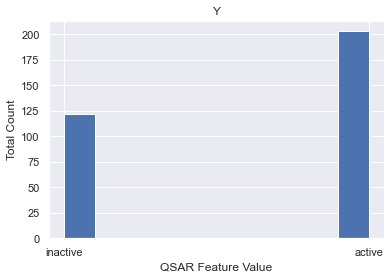

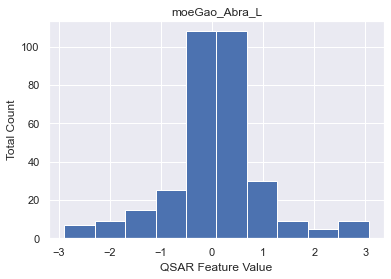

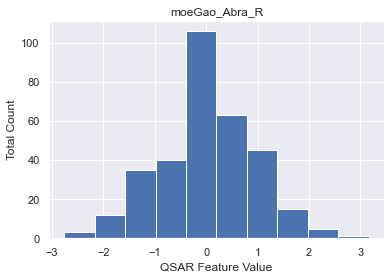

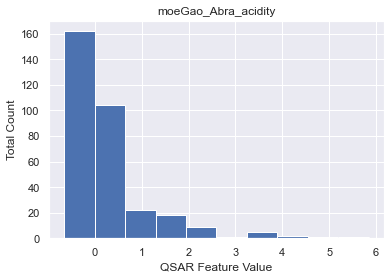

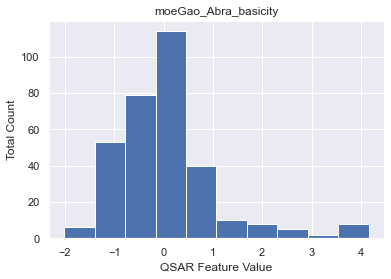

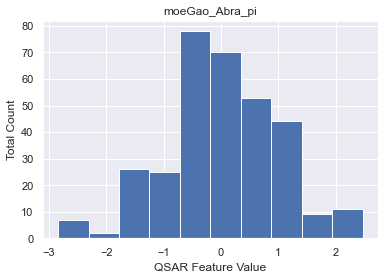

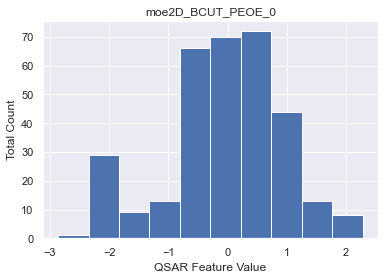

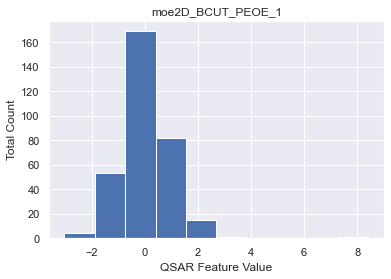

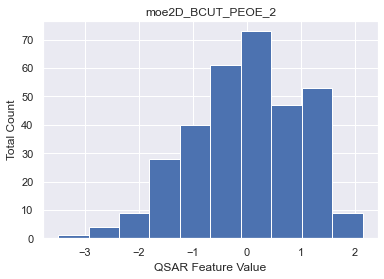

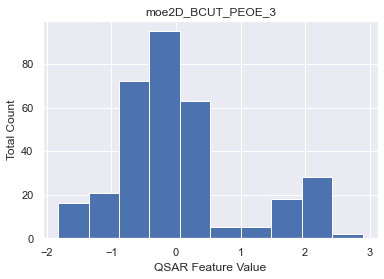

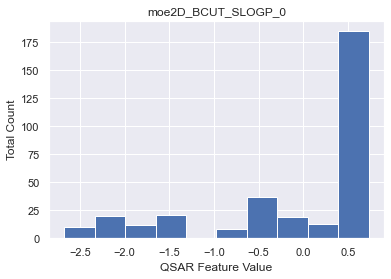

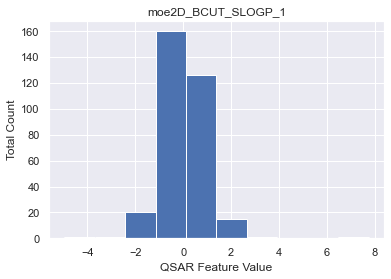

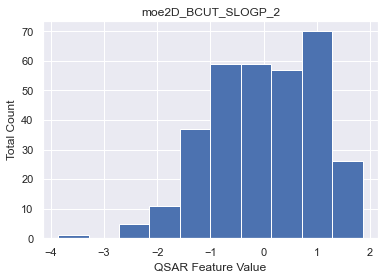

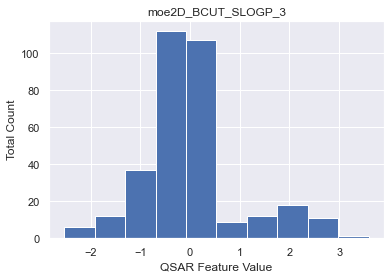

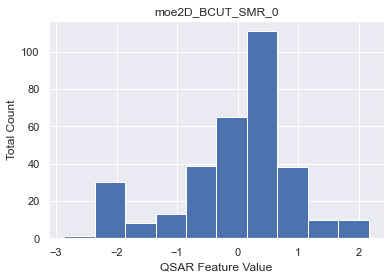

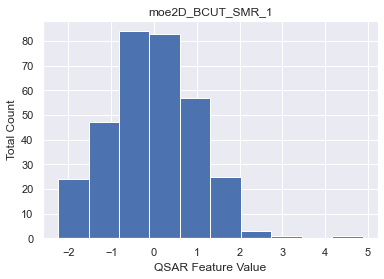

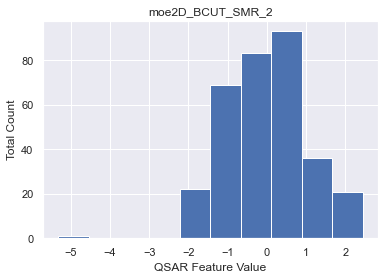

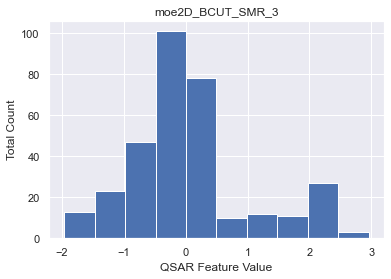

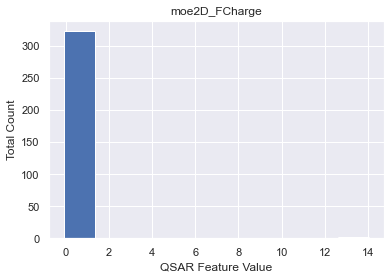

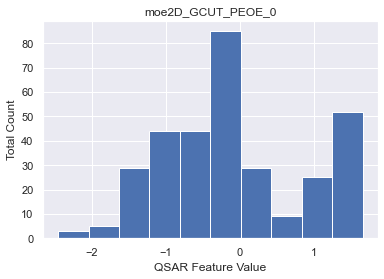

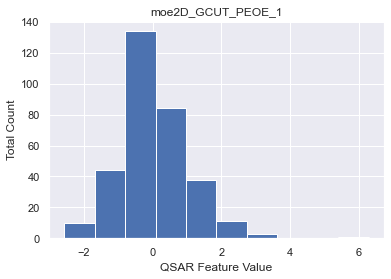

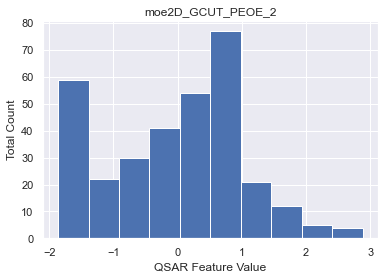

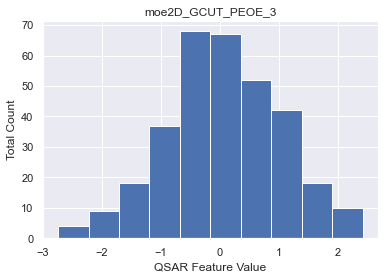

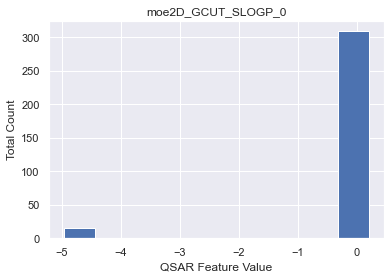

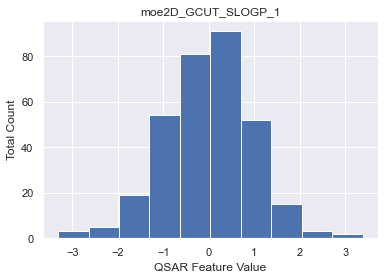

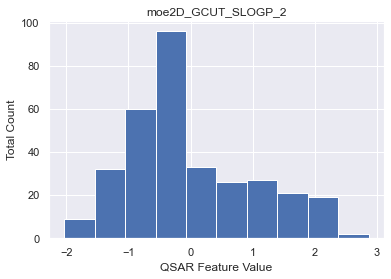

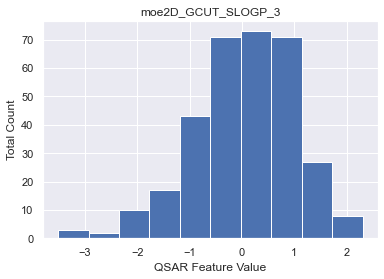

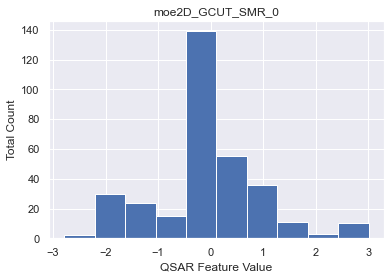

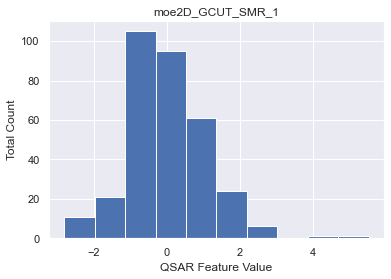

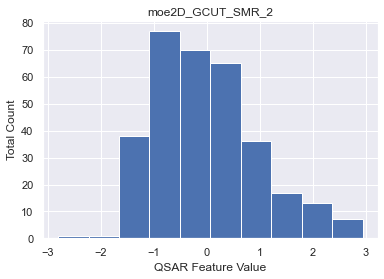

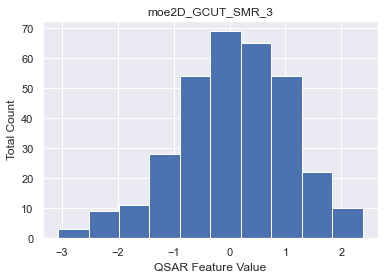

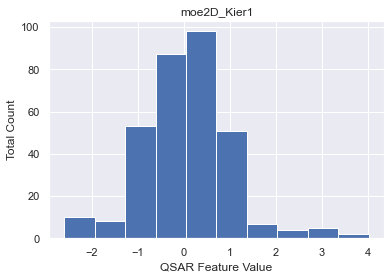

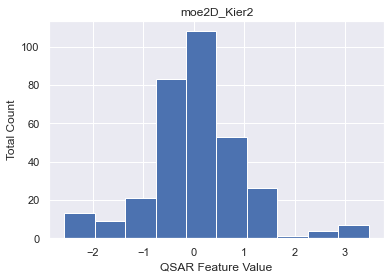

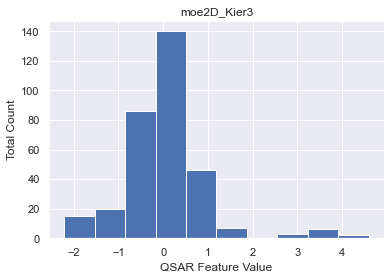

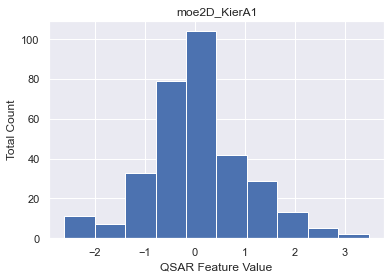

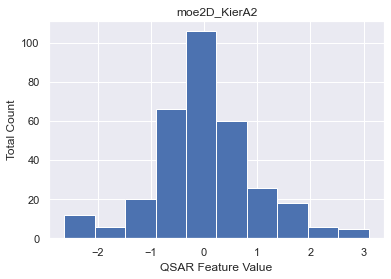

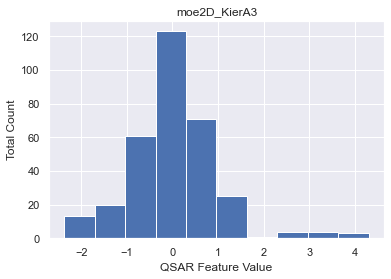

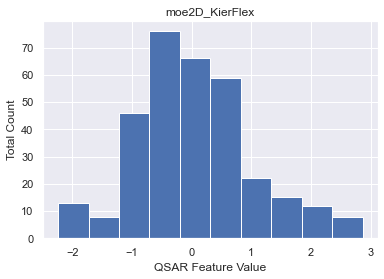

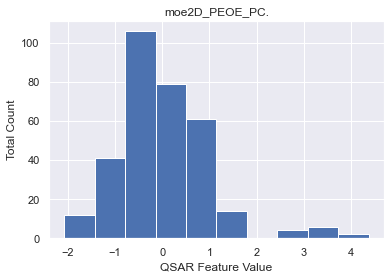

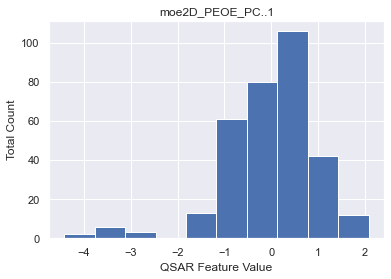

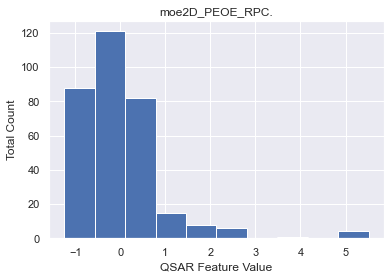

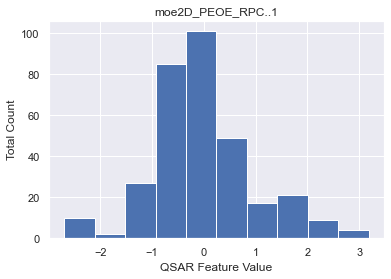

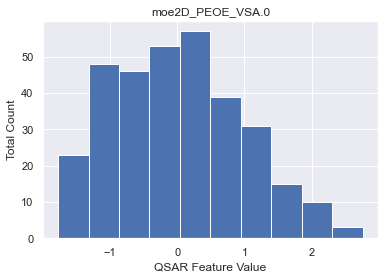

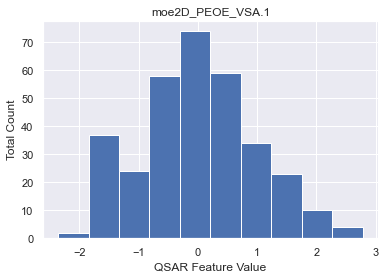

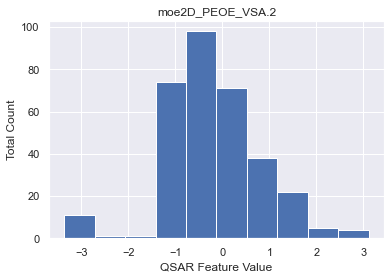

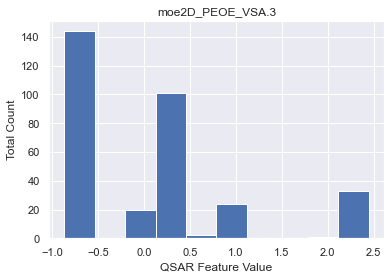

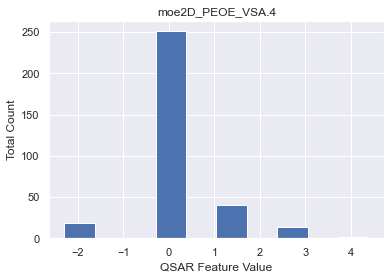

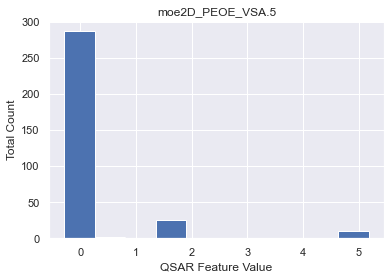

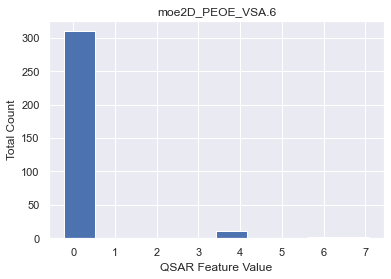

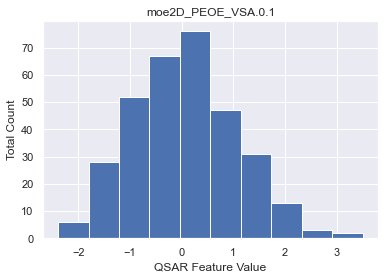

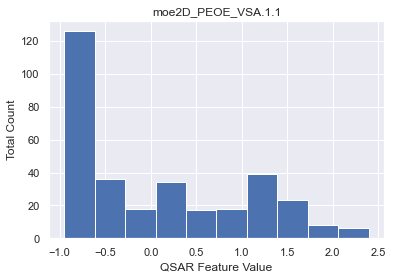

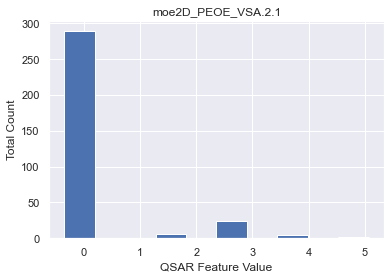

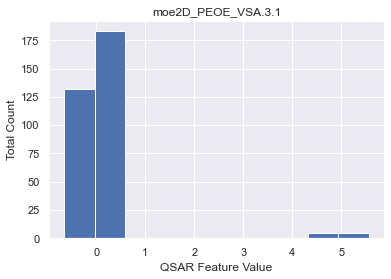

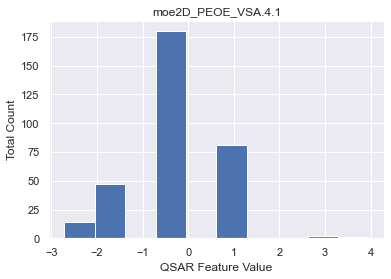

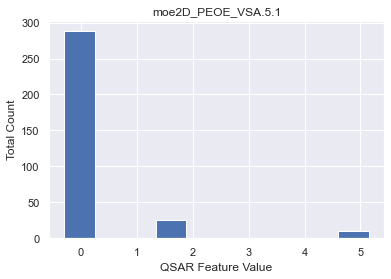

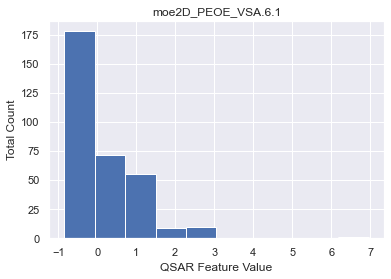

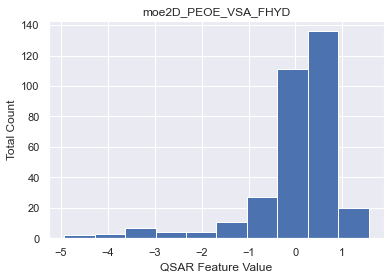

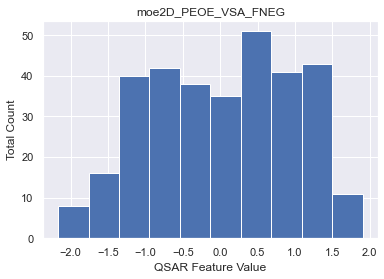

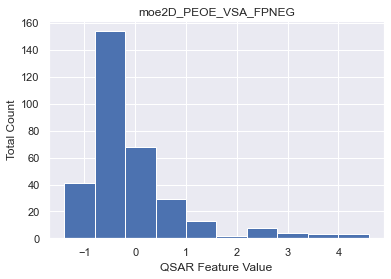

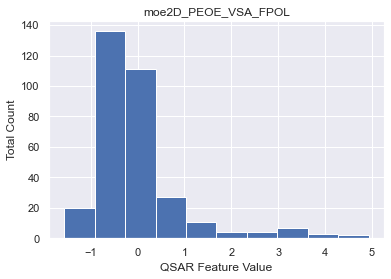

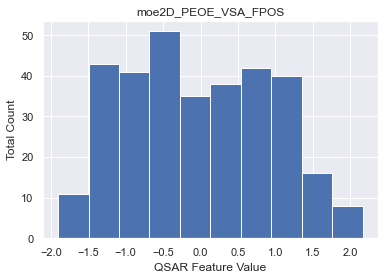

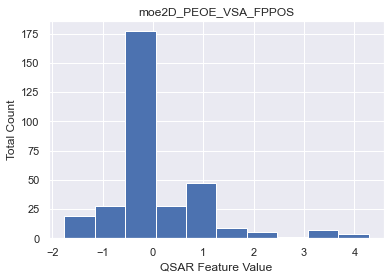

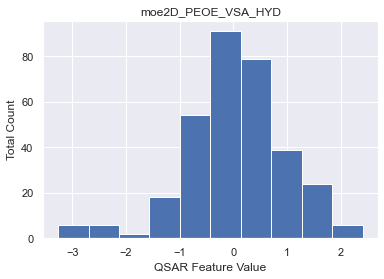

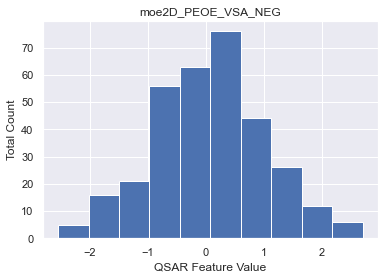

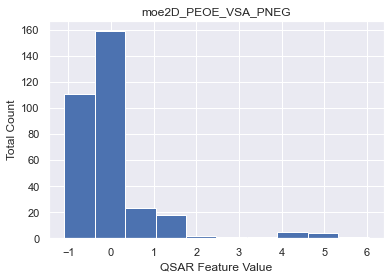

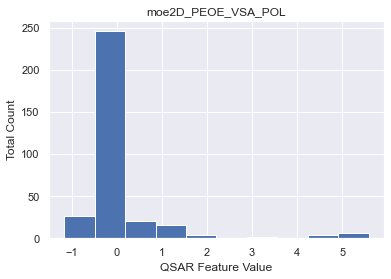

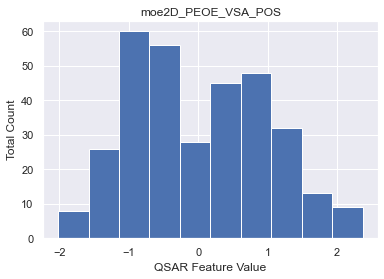

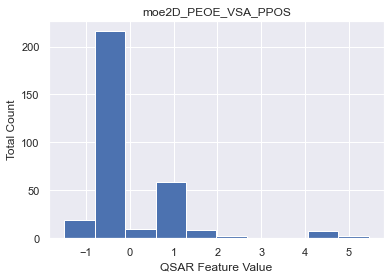

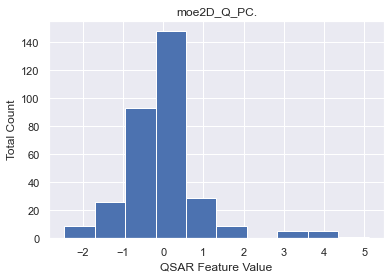

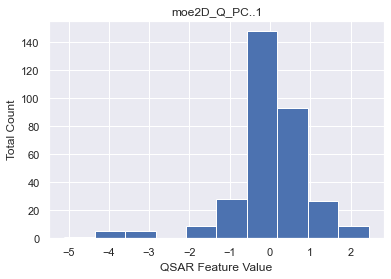

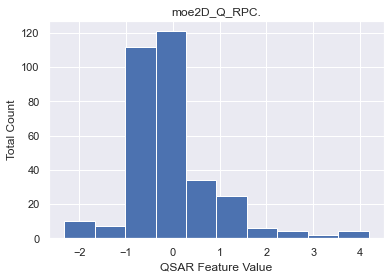

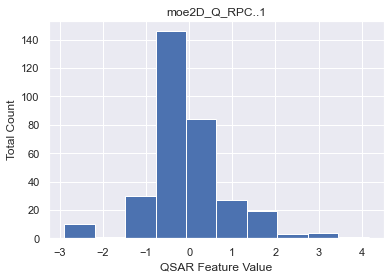

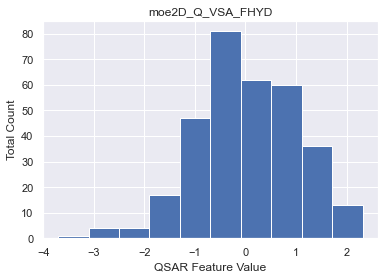

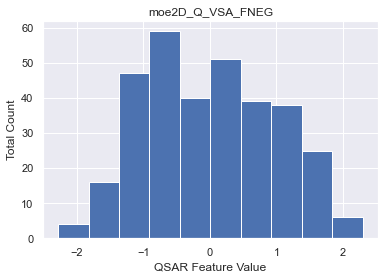

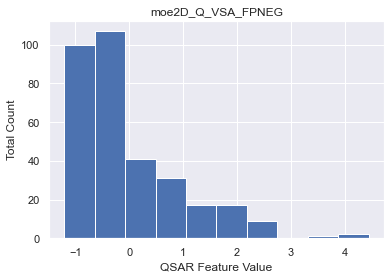

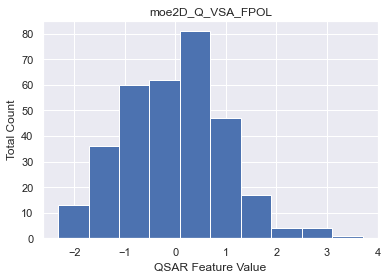

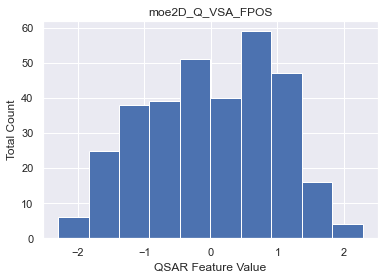

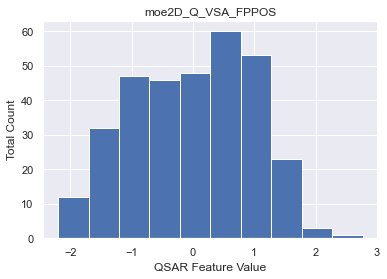

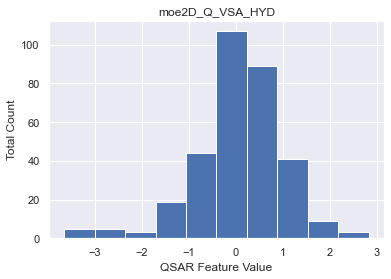

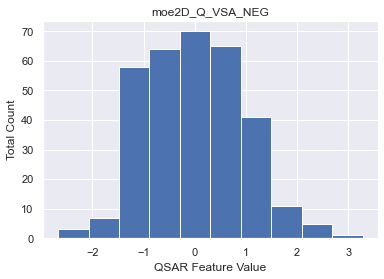

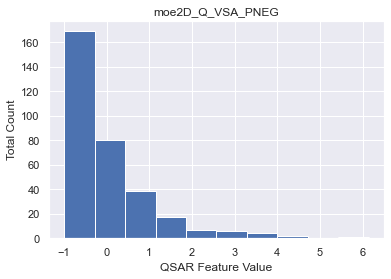

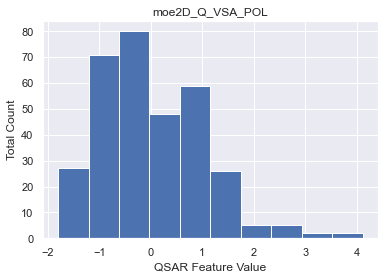

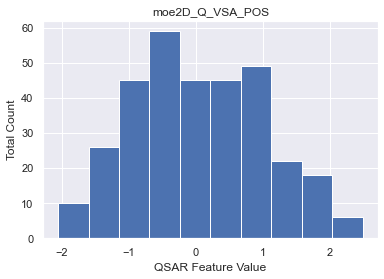

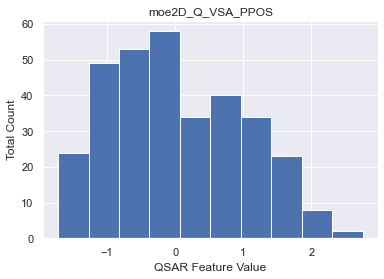

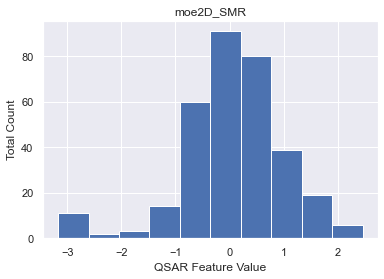

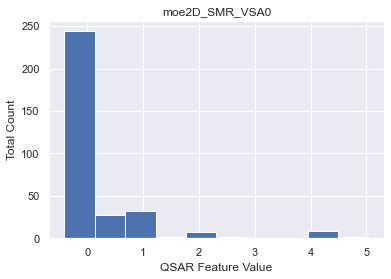

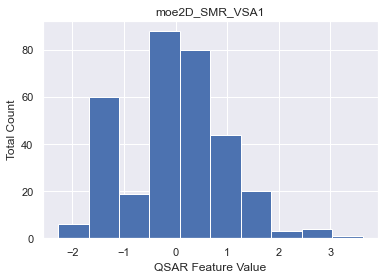

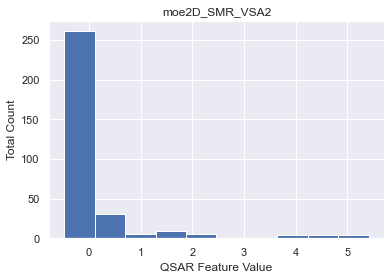

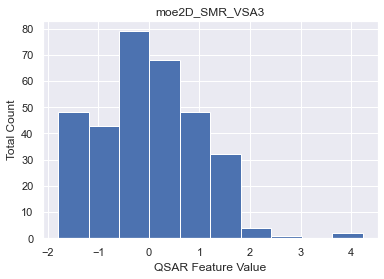

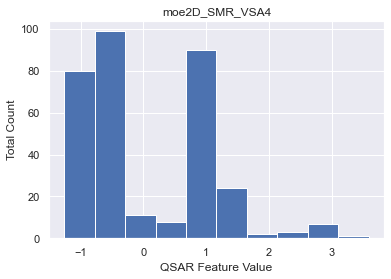

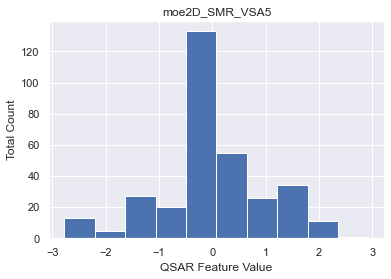

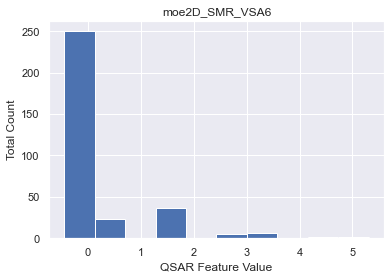

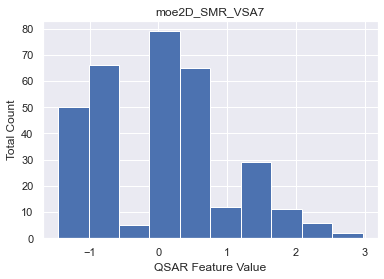

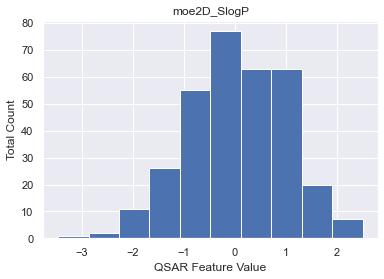

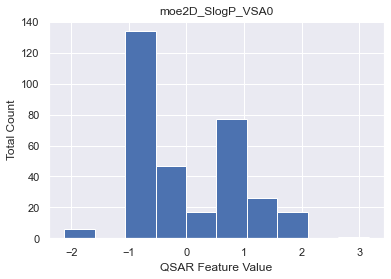

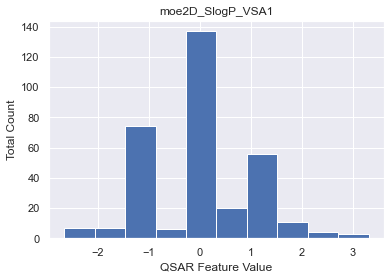

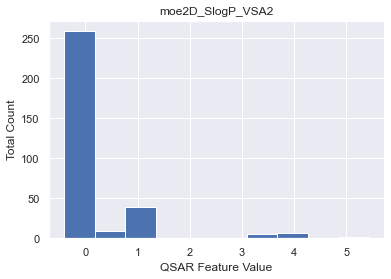

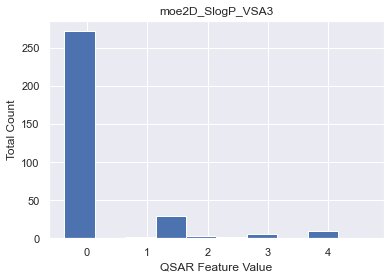

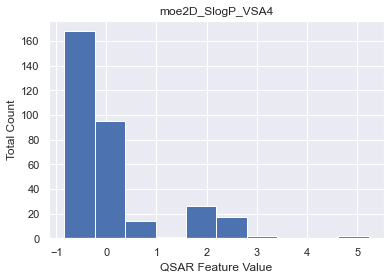

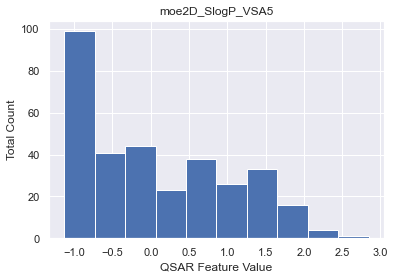

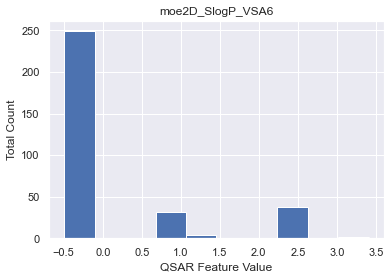

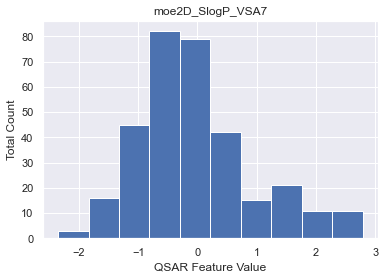

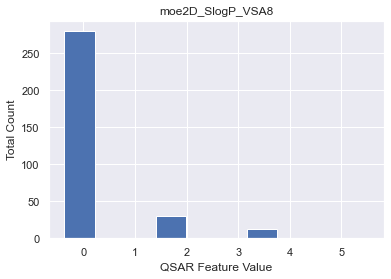

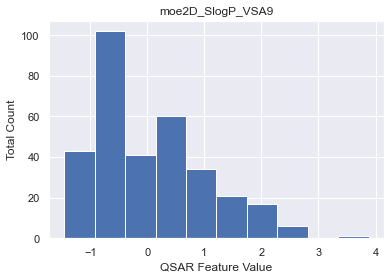

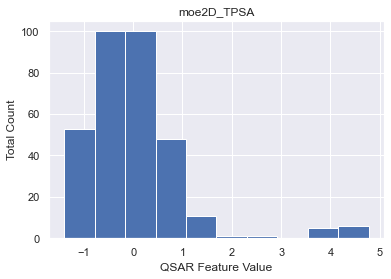

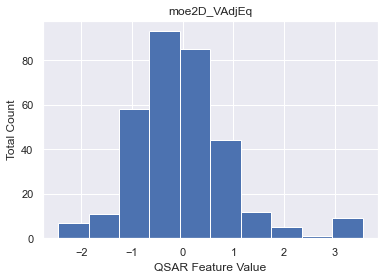

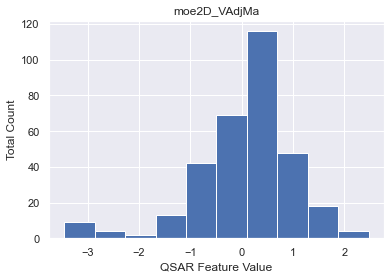

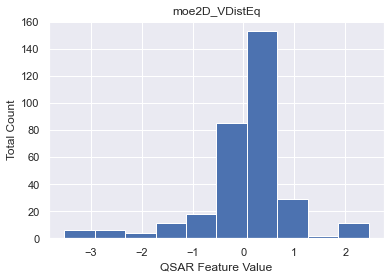

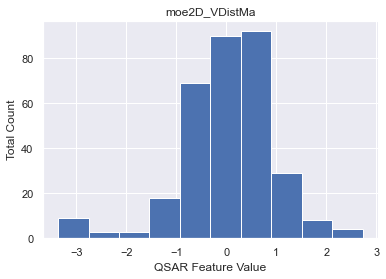

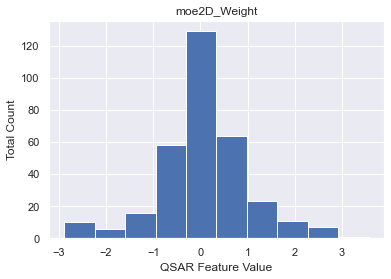

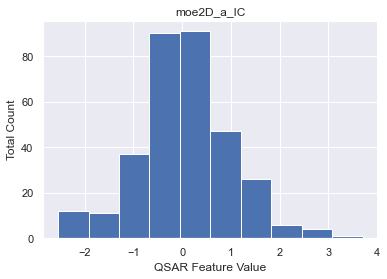

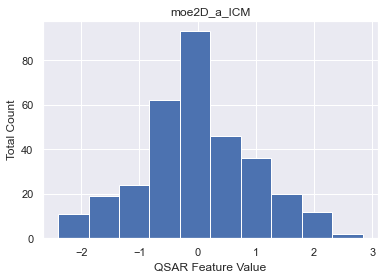

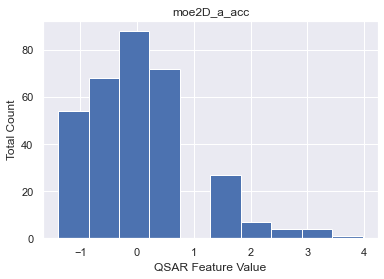

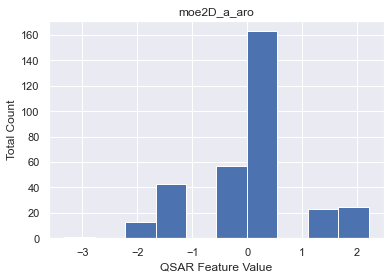

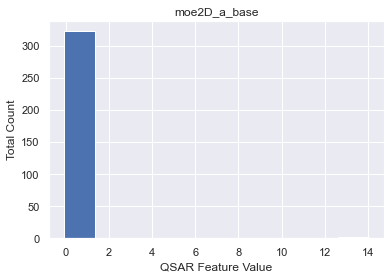

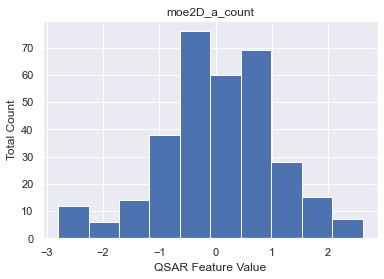

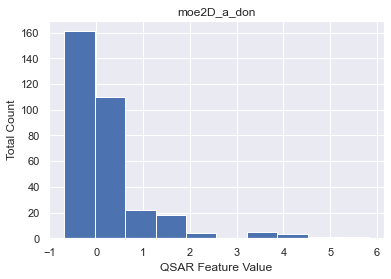

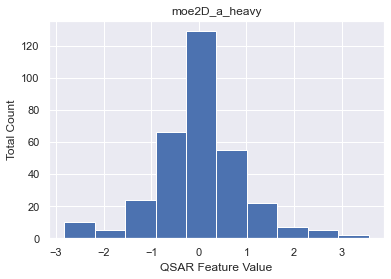

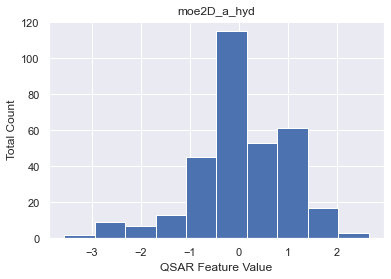

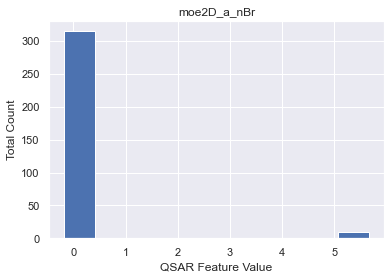

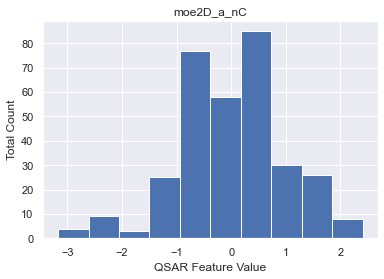

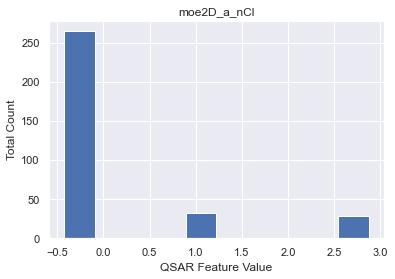

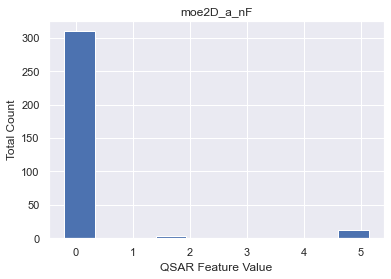

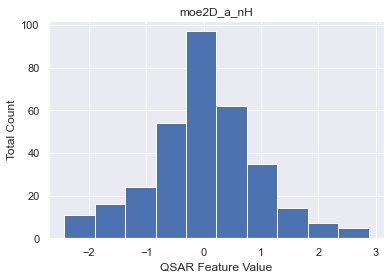

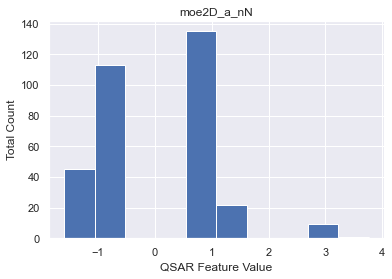

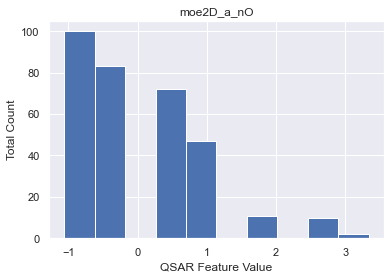

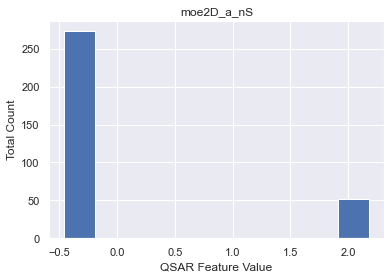

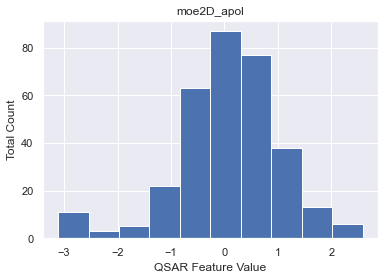

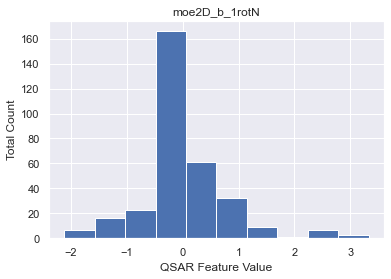

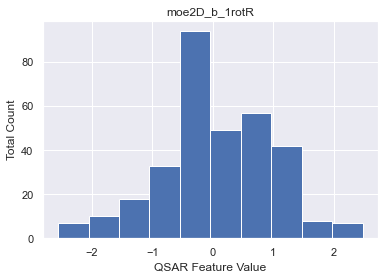

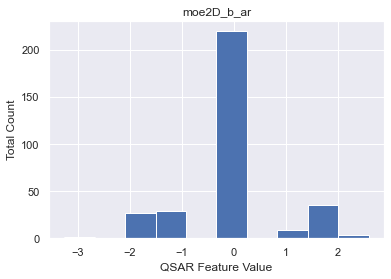

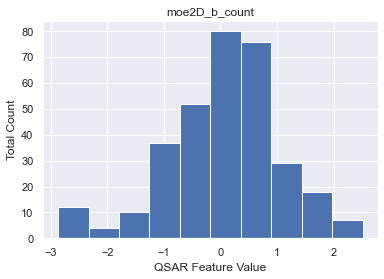

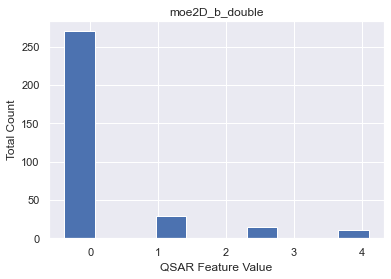

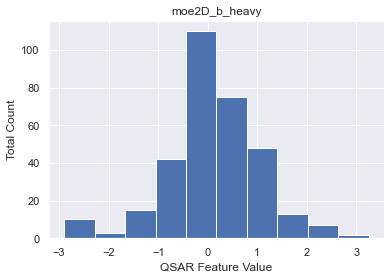

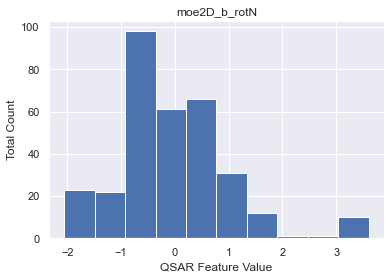

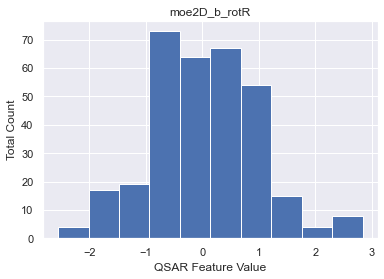

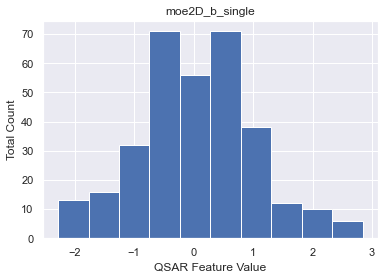

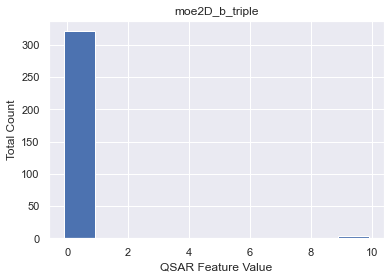

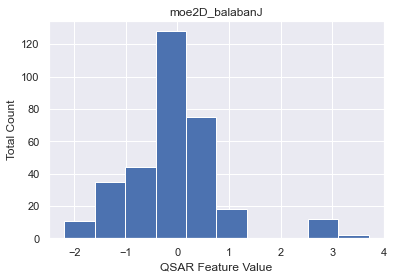

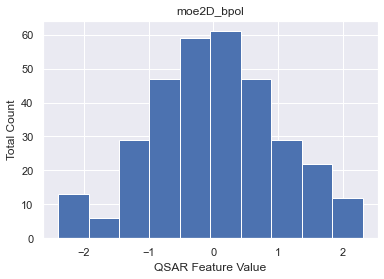

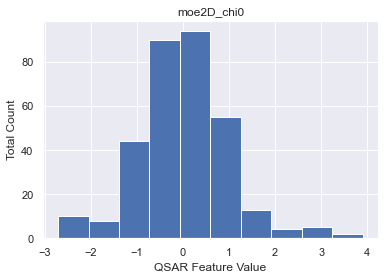

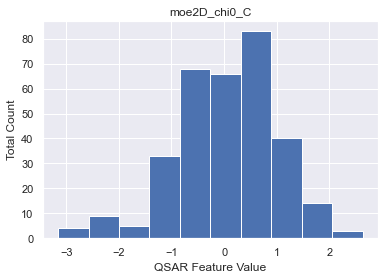

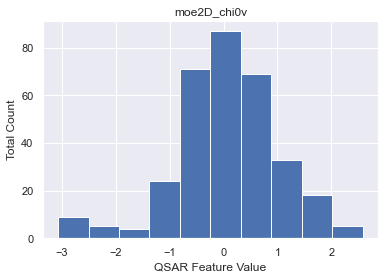

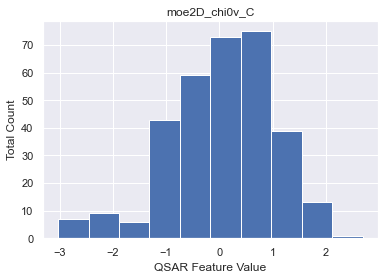

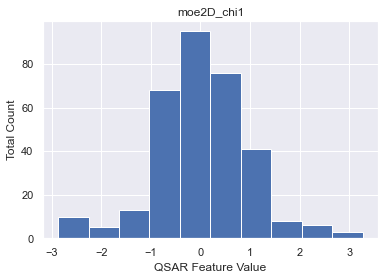

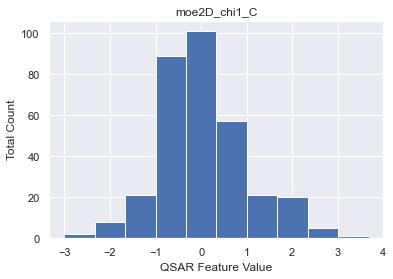

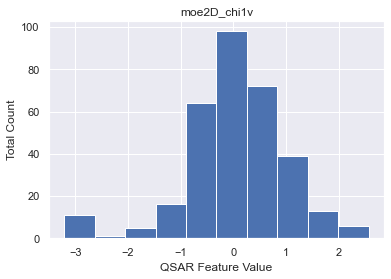

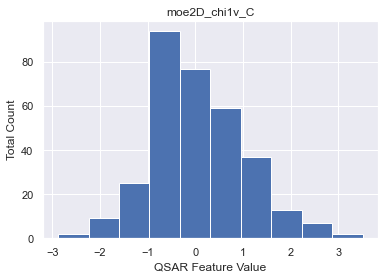

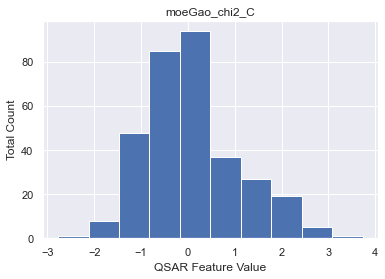

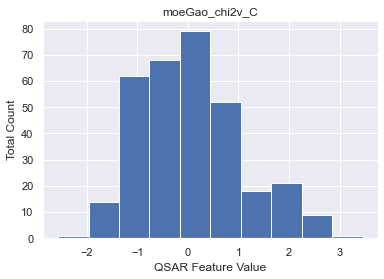

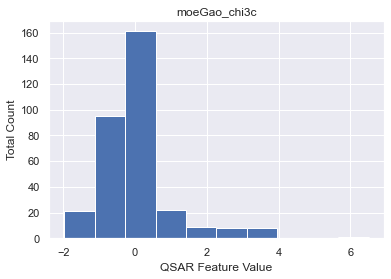

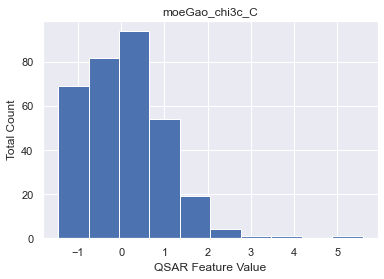

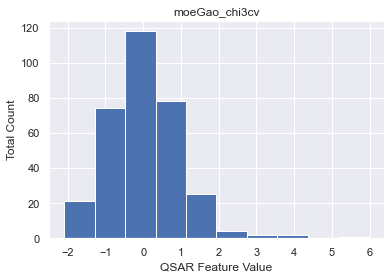

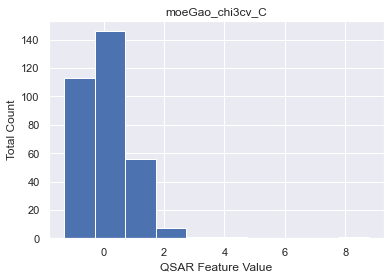

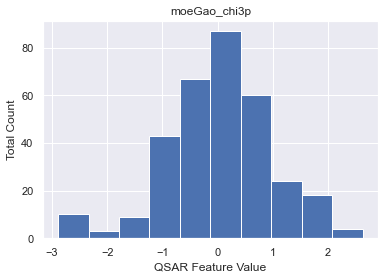

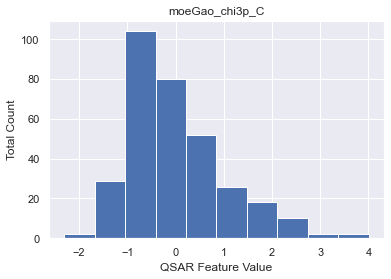

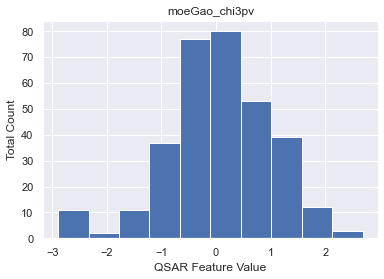

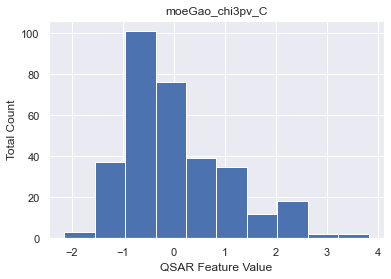

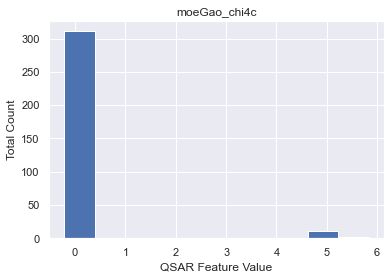

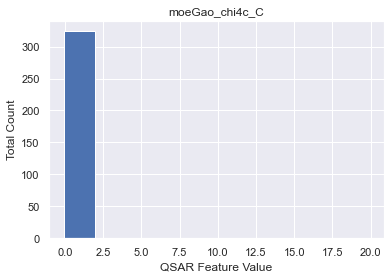

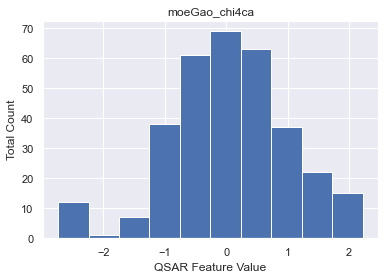

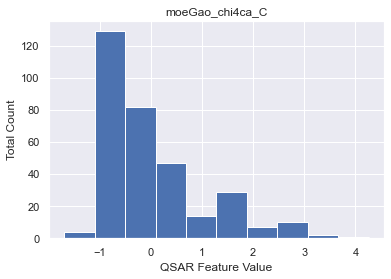

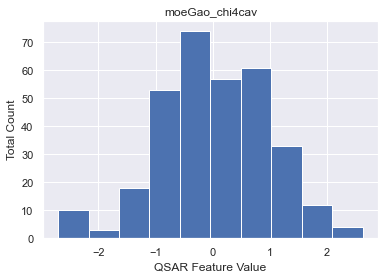

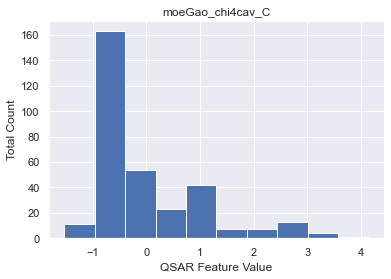

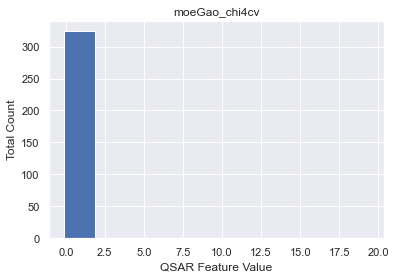

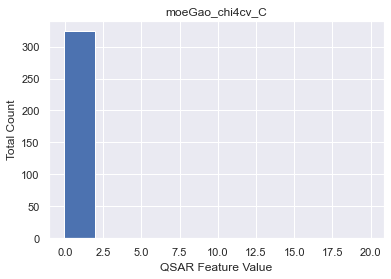

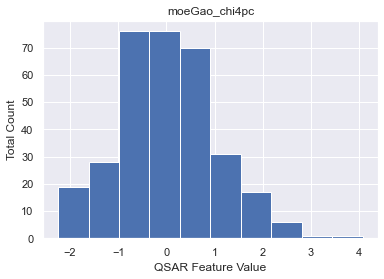

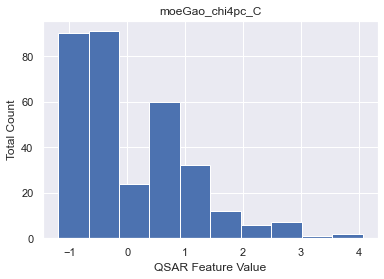

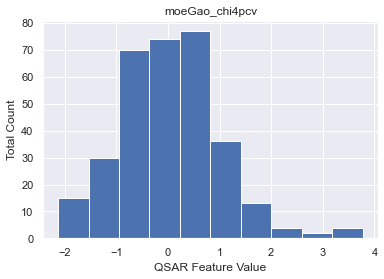

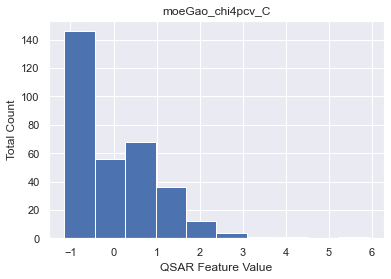

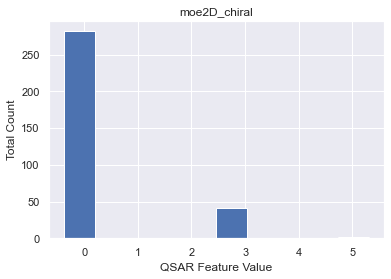

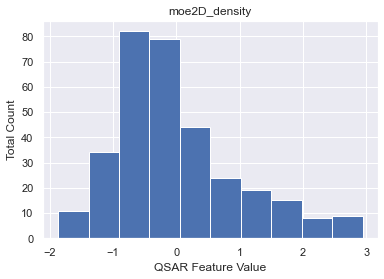

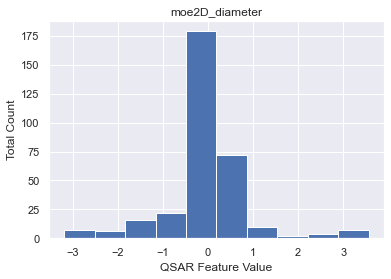

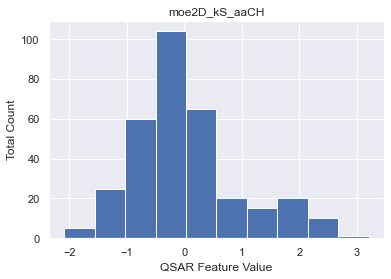

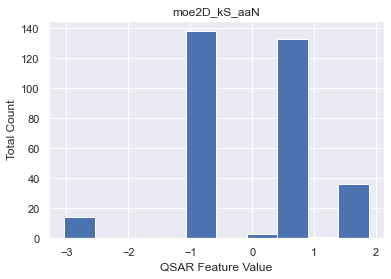

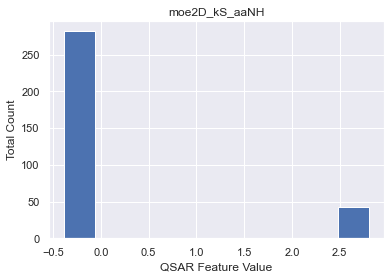

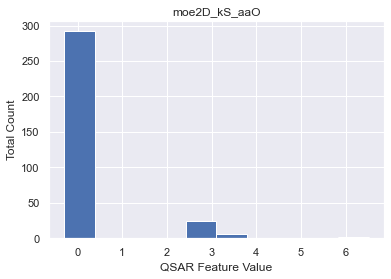

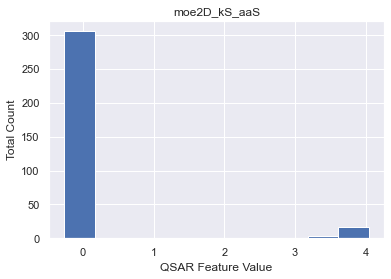

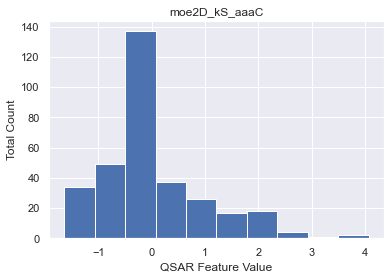

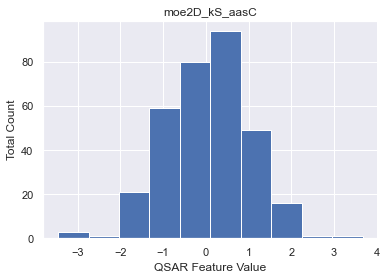

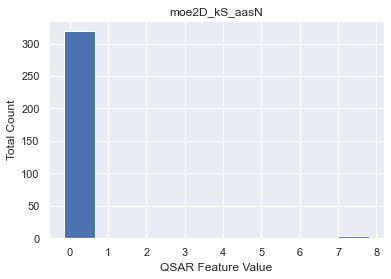

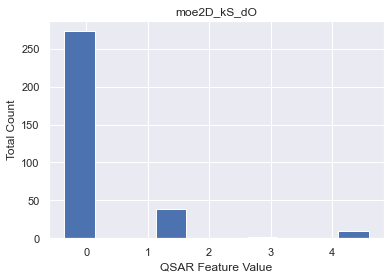

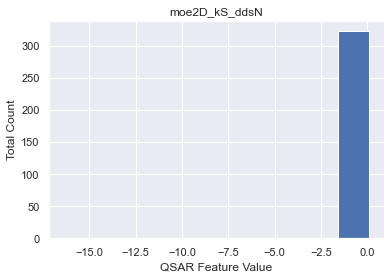

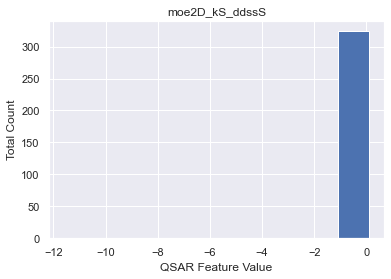

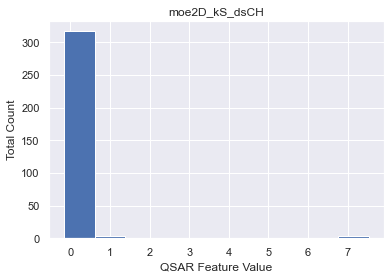

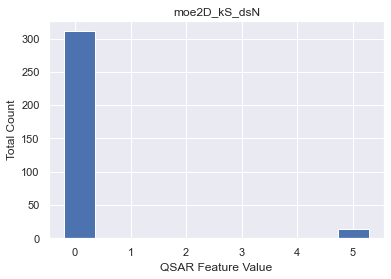

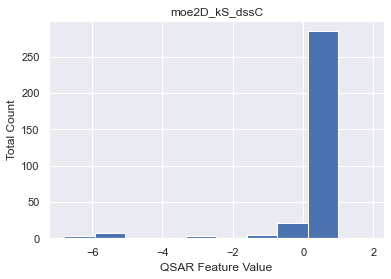

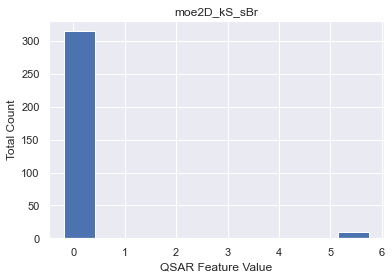

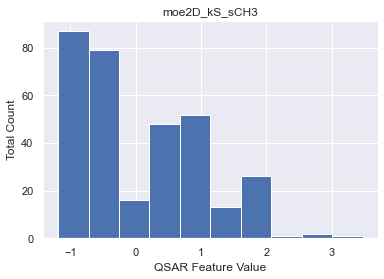

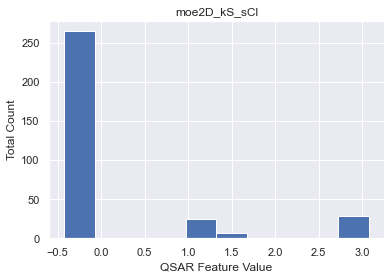

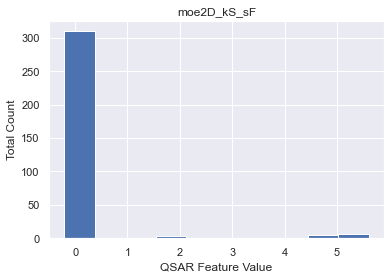

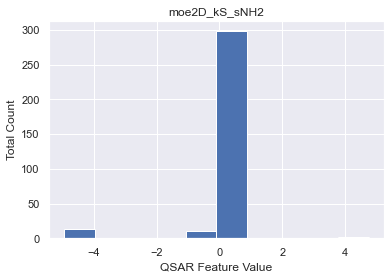

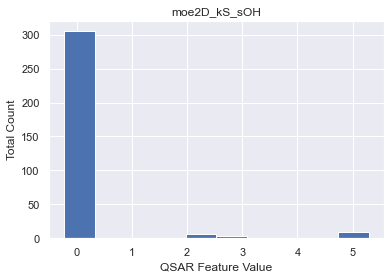

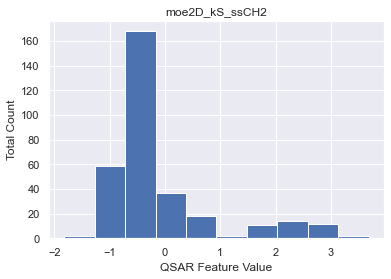

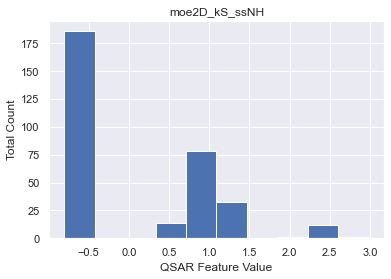

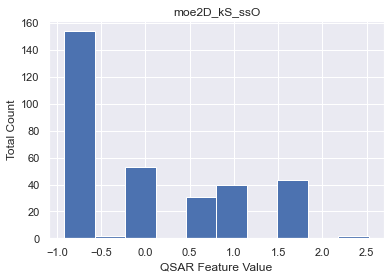

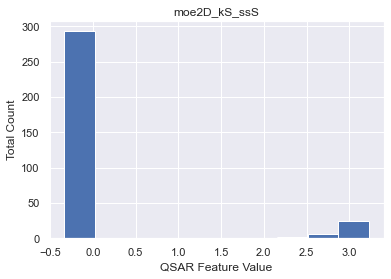

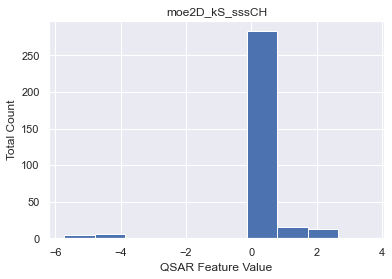

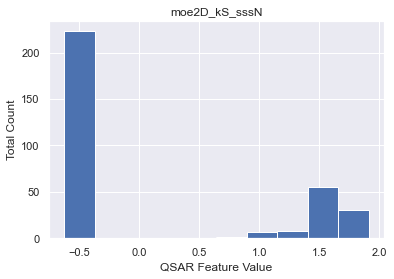

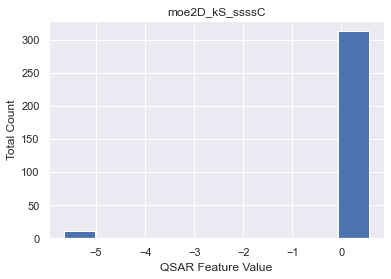

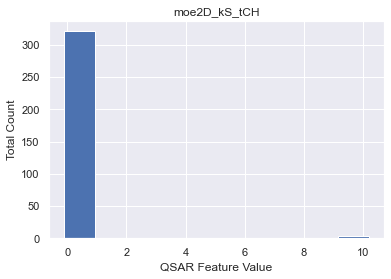

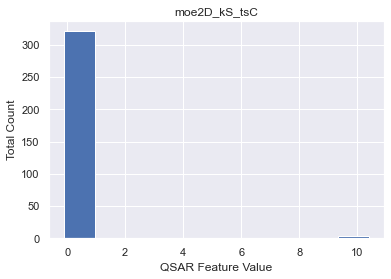

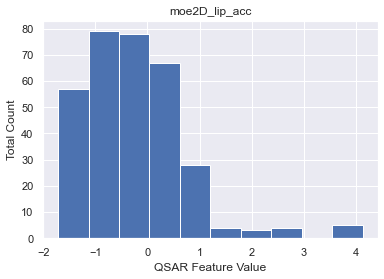

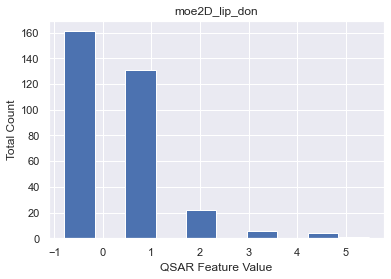

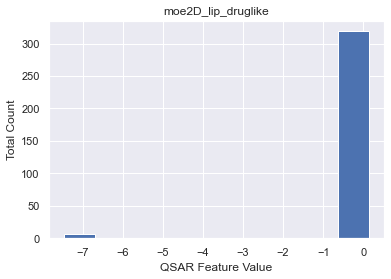

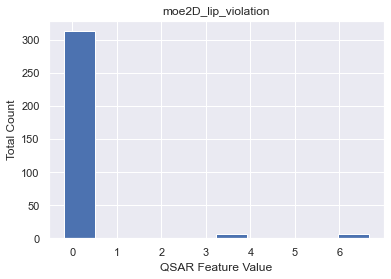

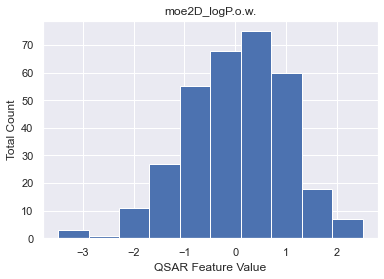

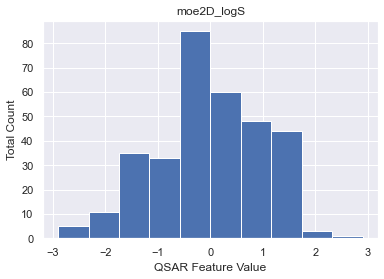

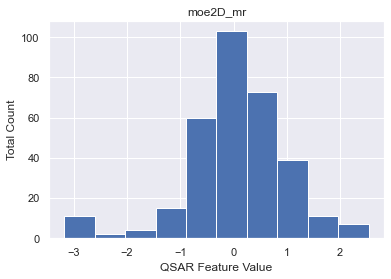

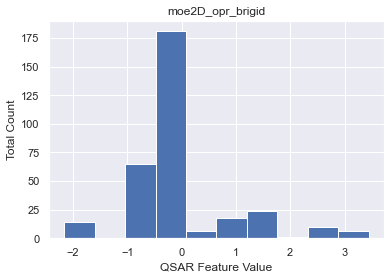

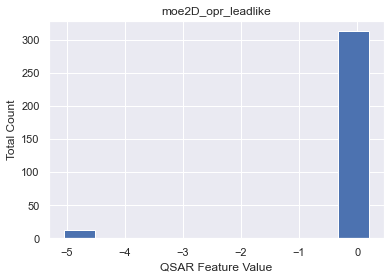

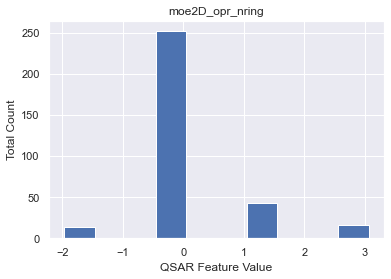

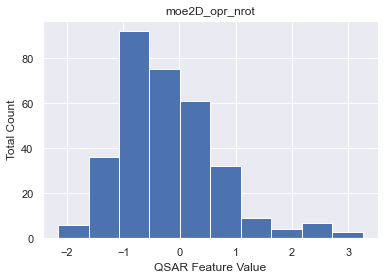

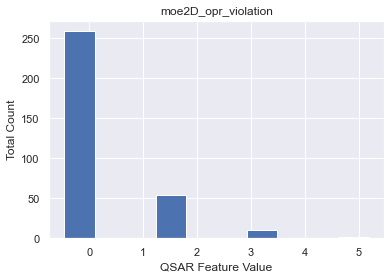

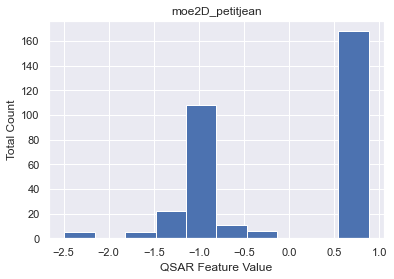

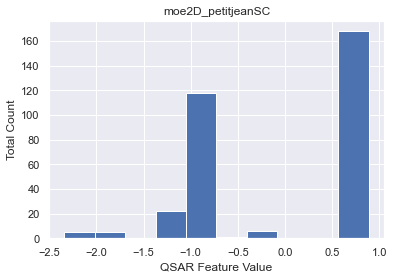

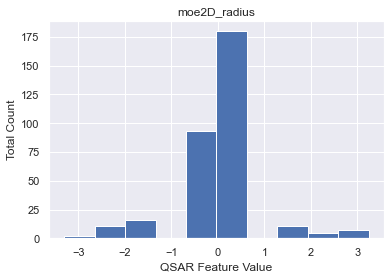

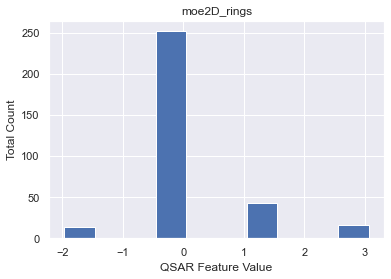

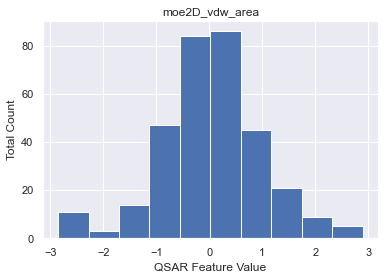

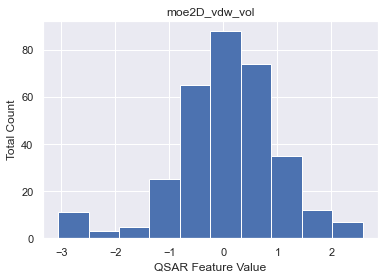

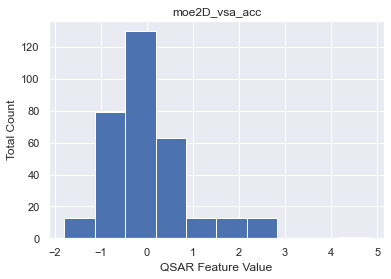

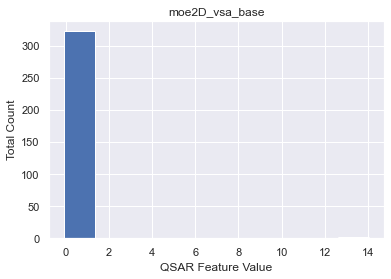

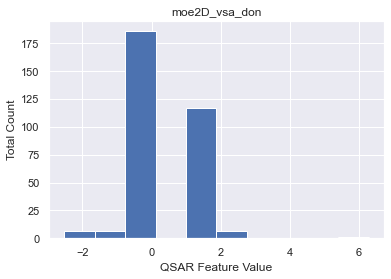

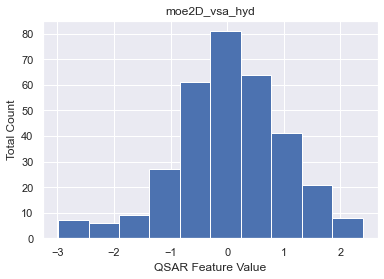

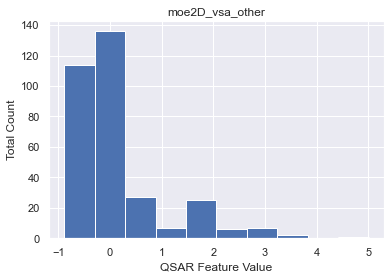

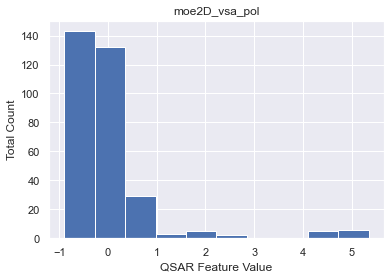

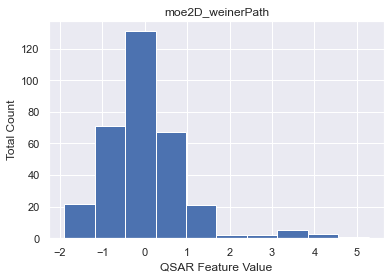

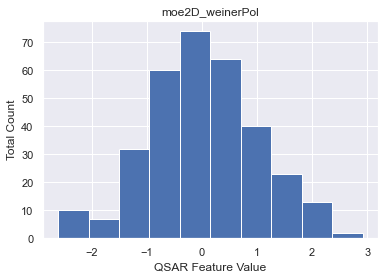

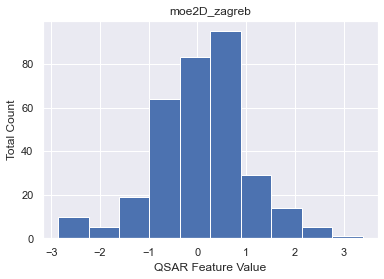

<Figure size 432x288 with 0 Axes>

In [5]:
qsar_metric_names = dhfr_data.columns.values

sb.set_theme()

for name in qsar_metric_names:
    dhfr_data[name].hist()
    plt.title(name)
    plt.xlabel("QSAR Feature Value")
    plt.ylabel("Total Count")
    plt.figure()

Plot the histogram of the distribution of the "Y" label, inhibitor activity again. We can obtain a starting metric representing the best performance of a classifier that predicts activity at random. In the cell block below, we see that 203/325 (majority label) entries are "active" inhibitors. Therefore, a classifer that predicts "active" for every inhibitor could achieve ~62.5% accuracy (203/325). The classifier must achieve a greater accuracy.

active      203
inactive    122
Name: Y, dtype: int64

Best classifier performance if it predicts "active" for all inhibitors: 0.6246153846153846


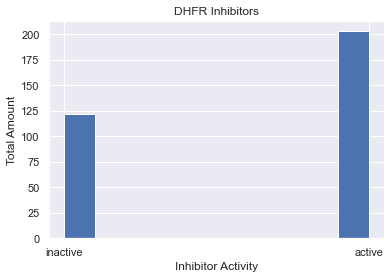

<Figure size 432x288 with 0 Axes>

In [6]:
dhfr_data["Y"].hist()
plt.title("DHFR Inhibitors")
plt.xlabel("Inhibitor Activity")
plt.ylabel("Total Amount")
plt.figure()

print(dhfr_data["Y"].value_counts())
# best classifier performance if it were to guess "active" every time
print(f'\nBest classifier performance if it predicts "active" for all inhibitors: {203/325}')

## Feature Processing

Support Vector Machine (SVM) will be one of the models we fit. It is sensitive to feature scales and therefore, it is a good idea to standardize the quantitative features. In addition, we must handle the categorical label, "Y" which again denotes either "active" or "inactive". 

In [7]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()

qsar_attribs = dhfr_data.drop("Y", axis=1)
std_qsar_attribs = std_scalar.fit_transform(qsar_attribs)

activity_label = dhfr_data["Y"]

# write a method to binarize activity_label instead of using a sklearn class such as LabelBinarizer
# this is to control the value mappings to follow the convention in drug discovery
# "active" -> 1 and "inactive" -> 0
def activity_enc(activity_label: pd.DataFrame) -> np.array:
    label_array = np.array(activity_label)
    binarized_label = []
    
    for label in label_array:
        if label == "inactive":
            binarized_label.append(0)
        if label == "active":
            binarized_label.append(1)

    return np.array(binarized_label)

binarized_label = activity_enc(activity_label)

# verify the labels are binarized as intended
print(activity_label)
print(binarized_label)

0      inactive
1      inactive
2      inactive
3      inactive
4      inactive
         ...   
320      active
321      active
322      active
323      active
324      active
Name: Y, Length: 325, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Model Training: LinearSVC, SVC Polynomial Kernel, Random Forest

Split the dataset into 3 sets: train/validation/test (60/20/20). It is important that prior to splitting, the dataset is shuffled. Notice the binarized labels printed in the cell block above; all "active" and "inactive" inhibitors are grouped together. All sets should contain both inhibitor types.

In [8]:
from sklearn.model_selection import train_test_split

# generate the train/test sets following an 80/20 split
# random_state=42 for reproducibility and shuffling
X_train, X_test, y_train, y_test = train_test_split(std_qsar_attribs, binarized_label, 
                                                    test_size=0.2, random_state=42)

# split the train sets further to generate a validations set
# following an overall train/validation/test splitting of 60/20/20
# random_state=42 for reproducibility
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# verify the splitting is 60/20/20 
print(f"Training set proportion: {len(X_train)/325}")
print(f"Validation set proportion: {len(X_val)/325}")
print(f"Test set proportion: {len(X_test)/325}")

Training set proportion: 0.6
Validation set proportion: 0.2
Test set proportion: 0.2


Fit LinearSVC, Polynomial SVC, and Random Forest models for binary classification.

In [9]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# LinearSVC: use default hyperparameters except max_iter to ensure convergence
lin_svc = LinearSVC(C=1, loss="hinge", max_iter=10000)
# Polynomial SVC
poly_svc = SVC(kernel="poly", degree=3, coef0=1, C=1)
# Random Forest: random_state=42 for reproducibility
rand_forest = RandomForestClassifier(random_state=42)

# fit models
lin_svc.fit(X_train, y_train.ravel())
poly_svc.fit(X_train, y_train.ravel())
rand_forest.fit(X_train, y_train.ravel())

# obtain the train, val, and test set accuracies for all models
lin_svc_train_score = lin_svc.score(X_train, y_train)
lin_svc_val_score = lin_svc.score(X_val, y_val)
lin_svc_test_score = lin_svc.score(X_test, y_test)

poly_svc_train_score = poly_svc.score(X_train, y_train)
poly_svc_val_score = poly_svc.score(X_val, y_val)
poly_svc_test_score = poly_svc.score(X_test, y_test)

rand_forest_train_score = rand_forest.score(X_train, y_train)
rand_forest_val_score = rand_forest.score(X_val, y_val)
rand_forest_test_score = rand_forest.score(X_test, y_test)

# contruct a DataFrame to display model accuracy performance
performance_df = pd.DataFrame({"Model": ["LinearSVC", "SVC Poly Kernel", "Random Forest"],
                               "Train Acc.": [lin_svc_train_score, poly_svc_train_score, rand_forest_train_score],
                               "Val. Acc.": [lin_svc_val_score, poly_svc_val_score, rand_forest_val_score],
                               "Test Acc.": [lin_svc_test_score, poly_svc_test_score, rand_forest_test_score],
                               "Val. Error": 
                               [f"{round((((lin_svc_train_score-lin_svc_val_score))/lin_svc_train_score*100),2)}%",
                                f"{round((((poly_svc_train_score-poly_svc_val_score))/poly_svc_train_score*100),2)}%",
                                f"{round((((rand_forest_train_score-rand_forest_val_score))/rand_forest_train_score*100),2)}%"],
                               "Test Error":
                               [f"{round((((lin_svc_train_score-lin_svc_test_score))/lin_svc_train_score*100),2)}%",
                                f"{round((((poly_svc_train_score-poly_svc_test_score))/poly_svc_train_score*100),2)}%",
                                f"{round((((rand_forest_train_score-rand_forest_test_score))/rand_forest_train_score*100),2)}%"]})

print(performance_df.to_string(index=False))

           Model  Train Acc.  Val. Acc.  Test Acc. Val. Error Test Error
       LinearSVC    0.994872   0.876923   0.892308     11.86%     10.31%
 SVC Poly Kernel    0.974359   0.907692   0.923077      6.84%      5.26%
   Random Forest    1.000000   0.892308   0.907692     10.77%      9.23%


In general, the accuracy on the validation and test sets is high for all 3 models. However, there is notable generalization error in the case of the LinearSVC and Random Forest models, suggesting overfitting. It is perhaps not surprising that the Random Forest model achieved perfect accuracy on the training set with decreased accuracies on the validation and test sets as no hyperparameter limitations were enforced during fitting. Consequently, the model was given total freedom in tree depth, nodes, etc. which is prone to lead to overfitting. Let's use cross-validation to investigate what the average generalization error is. This would give a better estimate of the generalization error to give us a starting point to improve the models. The goal is to train a model whose performance on the test set is as close as possible to the training set performance, thus minimizing generalization error.  

First, re-generate the train/test sets following at 80/20 split. The validation set is not explictly generated because subsequent cross-validation takes care of that.

In [10]:
# random_state=42 for reproducibility and shuffling
X_train, X_test, y_train, y_test = train_test_split(std_qsar_attribs, binarized_label, 
                                                    test_size=0.2, random_state=42)

# verify the splitting is 80/20
print(f"Training set proportion: {len(X_train)/325}")
print(f"Test set proportion: {len(X_test)/325}")

Training set proportion: 0.8
Test set proportion: 0.2


In [11]:
from sklearn.model_selection import cross_val_score

# use cv=4 so the validation set represents 20% of the overall dataset 
# since the train set is 80% of the overall dataset
lin_svc_cross_val_scores = cross_val_score(lin_svc, X_train, y_train.ravel(), cv=4)
poly_svc_cross_val_scores = cross_val_score(poly_svc, X_train, y_train.ravel(), cv=4)
rand_forest_cross_val_scores = cross_val_score(rand_forest, X_train, y_train.ravel(), cv=4)

print(f"LinearSVC Cross-Validation Validation Set Scores: {lin_svc_cross_val_scores}")
print(f"LinearSVC Cross-Validation Validation Set Scores Mean: {lin_svc_cross_val_scores.mean()}\n")
print(f"Poly SVC Cross-Validation Validation Set Scores: {poly_svc_cross_val_scores}")
print(f"Poly SVC Cross-Validation Validation Set Scores Mean: {poly_svc_cross_val_scores.mean()}\n")
print(f"Random Forest Cross-Validation Validation Set Scores: {rand_forest_cross_val_scores}")
print(f"Random Forest Cross-Validation Validation Set Scores Mean: {rand_forest_cross_val_scores.mean()}")

LinearSVC Cross-Validation Validation Set Scores: [0.86153846 0.90769231 0.83076923 0.93846154]
LinearSVC Cross-Validation Validation Set Scores Mean: 0.8846153846153846

Poly SVC Cross-Validation Validation Set Scores: [0.90769231 0.93846154 0.93846154 0.92307692]
Poly SVC Cross-Validation Validation Set Scores Mean: 0.926923076923077

Random Forest Cross-Validation Validation Set Scores: [0.92307692 0.93846154 0.95384615 0.90769231]
Random Forest Cross-Validation Validation Set Scores Mean: 0.9307692307692308


The cross-validation scores differ based on the different training folds used, as expected. The mean of all the LinearSVC and Poly SVC models is ~ 88.46% and ~92.69, respectively, which is quite similar to the generalization error when we trained the model above with the pre-generated and constant validation set (as opposed to cross-validation folds validation sets). In contrast, the mean cross-validation score for the Random Forest model is ~ 93.08 which is notably higher and in 1 case, is >95%. Taken together, these observations suggest that the LinearSVC model is slightly overfitting, the Poly SVC model performs well and generalizes well, and the Random Forest model can perform well given better training subsets.

The performance of all 3 models may be improved following hyperparameter optimization which can also reduce overfitting:

1) LinearSVC
* The hyperparameter, C controls the width of the support vector margins
* In general, reducing C widens the support vector margins and can decrease overfitting
* Adjusting C in our case will probably not reduce the generalization error as the model has already been trained
  with C=1 (default and lowest possible value of C)
  
2) Poly SVC
* The hyperparameter, C controls the width of the support vector margins
* The hyperparameter, degree controls the degree of polynomialization which adds features.
  High polynomial degrees can increase accuracy but leads to combinatorial explosion and can cause overfitting.
  Reducing the polynomial degree can reduce overfitting
* coef0 controls the polynomial features' affect on the model performance
* Since the Poly SVC model generalizes relatively well, the accuracy could be improved by increasing the polynomial degree   with a relatively lower risk of overfitting 

3) Random Forest
* Many hyperparameters --> below are 2 important ones
* n_estimators denoting the number of trees 
* max_features denoting the max number of features to consider when splitting 
* The majority of the hyperparameters used to train the Random Forest were static (ex. n_estimators was kept default     which is 100 from sklearn V0.22+)
* Since the Random Forest model is slightly overfitting, tuning the hyperparameters could reduce the generalization     error and lead to an overall better classifier

Let's try tuning the 3 models.

In [12]:
from sklearn.model_selection import GridSearchCV

# LinearSVC hyperparameters to try
lin_svc_param_grid = [{"C": list(range(1,11))}]

# Poly SVC hyperparameter combinations to try
poly_svc_param_grid = [{"C": list(range(1,11)), 
                        "degree": [2, 3, 4, 5, 6, 7, 8, 9, 10],
                        "coef0": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}]

# Random Forest hyperparameter combinations to try (there are many other hyperparameters that are not tried here)
rand_forest_param_grid = [{"n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                           "max_features": [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Fit all 3 models to find the best hyperparameters (cv=4 so the validation set is 20% of the overall dataset)
lin_svc_gscv = GridSearchCV(LinearSVC(loss="hinge", max_iter=10000), param_grid=lin_svc_param_grid, cv=4)
poly_svc_gscv = GridSearchCV(SVC(kernel="poly", probability=True), param_grid=poly_svc_param_grid, cv=4)
rand_forest_gscv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rand_forest_param_grid, cv=4)

# re-train all 3 models with the best hyperparameters found
lin_svc_gscv.fit(X_train, y_train.ravel())
poly_svc_gscv.fit(X_train, y_train.ravel())
rand_forest_gscv.fit(X_train, y_train.ravel())

# display the best hyperparameters from the combinations tried
print(f"LinearSVC Best Hyperparameters Found: {lin_svc_gscv.best_params_}")
print(f"Poly SVC Best Hyperparameters Found: {poly_svc_gscv.best_params_}")
print(f"Random Forest Best Hyperparameters Found: {rand_forest_gscv.best_params_}\n")

LinearSVC Best Hyperparameters Found: {'C': 1}
Poly SVC Best Hyperparameters Found: {'C': 3, 'coef0': 0.5, 'degree': 2}
Random Forest Best Hyperparameters Found: {'max_features': 6, 'n_estimators': 50}



The best hyperparameters found are displayed. Importantly, none of the hyperparameter values are at the extreme values tried (ex. Random Forest max_features=6 out of the possible vaues 2-10). If the fine-tuned hyperparameters were at the extreme values (ex. Random Forest max_features=10), then it could be worthwhile to expand the hyperparameter search space.

Let's next evaluate the fine-tuned models on the test set and generate a DataFrame to compare the models' performances pre-fine-tuning and post-fine-tuning.

In [13]:
# extract the performance score of all 3 models on the test set
lin_svc_gscv_test_score = lin_svc_gscv.score(X_test, y_test)
poly_svc_gscv_test_score = poly_svc_gscv.score(X_test, y_test)
rand_forest_gscv_test_score = rand_forest_gscv.score(X_test, y_test)

# contruct a DataFrame to compare all 3 models' performance following hyperparameter fine-tuning
fine_tuned_performance_df = pd.DataFrame({"Model": ["LinearSVC", "SVC Poly Kernel", "Random Forest"],
                               "Prev. Train Acc.": [lin_svc_train_score, poly_svc_train_score, rand_forest_train_score],
                               "Prev. Test Acc.": [lin_svc_test_score, poly_svc_test_score, rand_forest_test_score],
                               "Prev. Test Error":
                               [f"{round((((lin_svc_train_score-lin_svc_test_score))/lin_svc_train_score*100),2)}%",
                                f"{round((((poly_svc_train_score-poly_svc_test_score))/poly_svc_train_score*100),2)}%",
                                f"{round((((rand_forest_train_score-rand_forest_test_score))/rand_forest_train_score*100),2)}%"],
                               "New Train Acc.": [lin_svc_gscv.best_score_, poly_svc_gscv.best_score_, rand_forest_gscv.best_score_],
                               "New Test Acc.": [lin_svc_gscv_test_score, poly_svc_gscv_test_score, rand_forest_gscv_test_score],
                               "New Test Error":
                               [f"{round((((lin_svc_gscv.best_score_-lin_svc_gscv_test_score))/lin_svc_gscv.best_score_*100),2)}%",
                                f"{round((((poly_svc_gscv.best_score_-poly_svc_gscv_test_score))/poly_svc_gscv.best_score_*100),2)}%",
                                f"{round((((rand_forest_gscv.best_score_-rand_forest_gscv_test_score))/rand_forest_gscv.best_score_*100),2)}%"]})

print(fine_tuned_performance_df.to_string(index=False))                   

           Model  Prev. Train Acc.  Prev. Test Acc. Prev. Test Error  New Train Acc.  New Test Acc. New Test Error
       LinearSVC          0.994872         0.892308           10.31%        0.884615       0.892308         -0.87%
 SVC Poly Kernel          0.974359         0.923077            5.26%        0.938462       0.938462           0.0%
   Random Forest          1.000000         0.907692            9.23%        0.942308       0.923077          2.04%


The generalization errors for all 3 models improved a lot! 

1) LinearSVC
* The LinearSVC performance on the test set stayed the same 
* The fine-tuned LinearSVC training accuracy decreased but this is due to taking the average training score from 
  c=4 cross-validation as opposed to training using the entire training set. The more important comparison is the
  relative performance on the test set and we see that the model now generalizes much better. In fact, the "New Test     Error" is negative because the performance on the test set exceeds the training set.
  
2) Poly SVC
* Similar to LinearSVC, the training accuracy decreased. However, the test accuracy increased and is actually           identical with the training accuracy, yielding a generalization error of 0. 
* The perhaps slight overfitting previously seems to have been rectified (at least for this test set. This is no         guarantee the model will perform as well on completely new data.)

3) Random Forest
* Training accuracy decreased but test accuracy increased, yielding a much lower generalization error (2.04%)
* The model was overfitting before (again, maybe expected as the hyperparameters were given total freedom for tree       growth) but now we have reduced the overfitting to yield a model that can generalize much better

Based on these metrics alone, it seems that the Poly SVC would be the model of choice given the best test set accuracy and generalization. However, it is useful to look at metrics beyond accuracy especially as this is a classification task. Let's take a look at the confusion matrix along with the precision and recall scores. These metrics will offer further insights into the models' performances.

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# obtain the predictions on X_train using the fine-tuned hyperparameters
lin_svc_gscv_y_train_pred = lin_svc_gscv.predict(X_train)
poly_svc_gscv_y_train_pred = poly_svc_gscv.predict(X_train)
rand_forest_gscv_y_train_pred = rand_forest_gscv.predict(X_train)

print(f"Fine-Tuned LinearSVC X_train Confusion Matrix: \n {confusion_matrix(y_train, lin_svc_gscv_y_train_pred)}")
print(f"Average Cross-Validation Accuracy: {lin_svc_gscv.best_score_}")
print(f"Precision Score: {precision_score(y_train, lin_svc_gscv_y_train_pred)}")
print(f"Recall Score: {recall_score(y_train, lin_svc_gscv_y_train_pred)}\n")

print(f"Fine-Tuned Poly SVC X_train Confusion Matrix: \n {confusion_matrix(y_train, poly_svc_gscv_y_train_pred)}")
print(f"Average Cross-Validation Accuracy: {poly_svc_gscv.best_score_}")
print(f"Precision Score: {precision_score(y_train, poly_svc_gscv_y_train_pred)}")
print(f"Recall Score: {recall_score(y_train, poly_svc_gscv_y_train_pred)}\n")

print(f"Fine-Tuned Random Forest X_train Confusion Matrix: \n {confusion_matrix(y_train, rand_forest_gscv_y_train_pred)}")
print(f"Average Cross-Validation Accuracy: {rand_forest_gscv.best_score_}")
print(f"Precision Score: {precision_score(y_train, rand_forest_gscv_y_train_pred)}")
print(f"Recall Score: {recall_score(y_train, rand_forest_gscv_y_train_pred)}\n")

Fine-Tuned LinearSVC X_train Confusion Matrix: 
 [[ 94   0]
 [  1 165]]
Average Cross-Validation Accuracy: 0.8846153846153846
Precision Score: 1.0
Recall Score: 0.9939759036144579

Fine-Tuned Poly SVC X_train Confusion Matrix: 
 [[ 87   7]
 [  1 165]]
Average Cross-Validation Accuracy: 0.9384615384615385
Precision Score: 0.9593023255813954
Recall Score: 0.9939759036144579

Fine-Tuned Random Forest X_train Confusion Matrix: 
 [[ 94   0]
 [  0 166]]
Average Cross-Validation Accuracy: 0.9423076923076923
Precision Score: 1.0
Recall Score: 1.0



The precision and recall scores for all 3 models trained with the fine-tuned hyperparameters are nearly perfect for the training set! Note that there seems to be a discrepancy between the accuracy and the precision and recall scores. For example, the LinearSVC confusion matrix only displays 1 misclassification which is reflected correctly in the Recall score < 1. However, how is it that the "accuracy" is ~88.5% if the model only made 1 misclassification? The reason is because the accuracy score represents the average accuracy score obtained following cross-validation. Recall the training set which made up 80% of the overall dataset was fed into GridSearchCV. Cross-validation used 4 folds and therefore, each model was trained on some combination of 3 folds (60% of the training data) and validated on the remaining fold (20% of the training data). The accuracy represents the average accuracy of this cross-validation. Moreover, once the optimal hyperparameters were determined by GridSearchCV, the models were re-fit using the entire training set (80% of the overall data). These two factors taken together explain the "discrepancy" in the accuracy. In reality, GridSearchCV improved the models as shown in the previous DataFrame comparing the generalization errors pre and post hyperparameter fine-tuning. Overfitting was reduced and the models generalize on new data better.

Let's now calculate the precision and recall scores on the test data and observe how the training set performance carries over to test set performance.

In [15]:
# obtain the predictions on X_test using the fine-tuned hyperparameters
lin_svc_gscv_y_test_pred = lin_svc_gscv.predict(X_test)
poly_svc_gscv_y_test_pred = poly_svc_gscv.predict(X_test)
rand_forest_gscv_y_test_pred = rand_forest_gscv.predict(X_test)

print(f"Fine-Tuned LinearSVC X-test Confusion Matrix: \n {confusion_matrix(y_test, lin_svc_gscv_y_test_pred)}")
print(f"Average Cross-Validation Accuracy: {lin_svc_gscv.best_score_}")
print(f"Test Set Accuracy: {lin_svc_gscv_test_score}")
print(f"Precision Score: {precision_score(y_test, lin_svc_gscv_y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, lin_svc_gscv_y_test_pred)}\n")

print(f"Fine-Tuned Poly SVC X_test Confusion Matrix: \n {confusion_matrix(y_test, poly_svc_gscv_y_test_pred)}")
print(f"Average Cross-Validation Accuracy: {poly_svc_gscv.best_score_}")
print(f"Test Set Accuracy: {poly_svc_gscv_test_score}")
print(f"Precision Score: {precision_score(y_test, poly_svc_gscv_y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, poly_svc_gscv_y_test_pred)}\n")

print(f"Fine-Tuned Random Forest X_test Confusion Matrix: \n {confusion_matrix(y_test, rand_forest_gscv_y_test_pred)}")
print(f"Average Cross-Validation Accuracy: {rand_forest_gscv.best_score_}")
print(f"Test Set Accuracy: {rand_forest_gscv_test_score}")
print(f"Precision Score: {precision_score(y_test, rand_forest_gscv_y_test_pred)}")
print(f"Recall Score: {recall_score(y_test, rand_forest_gscv_y_test_pred)}\n")

Fine-Tuned LinearSVC X-test Confusion Matrix: 
 [[23  5]
 [ 2 35]]
Average Cross-Validation Accuracy: 0.8846153846153846
Test Set Accuracy: 0.8923076923076924
Precision Score: 0.875
Recall Score: 0.9459459459459459

Fine-Tuned Poly SVC X_test Confusion Matrix: 
 [[25  3]
 [ 1 36]]
Average Cross-Validation Accuracy: 0.9384615384615385
Test Set Accuracy: 0.9384615384615385
Precision Score: 0.9230769230769231
Recall Score: 0.972972972972973

Fine-Tuned Random Forest X_test Confusion Matrix: 
 [[24  4]
 [ 1 36]]
Average Cross-Validation Accuracy: 0.9423076923076923
Test Set Accuracy: 0.9230769230769231
Precision Score: 0.9
Recall Score: 0.972972972972973



The precision and recall scores for all 3 models have decreased which is to be expected. In general, they are still very good. Note that the accuracy score is the true accuracy displayed by the confusion matrix and not the average accuracy from cross-validation as was the case in the cell block above. This is because the test set was untouched during training and was not fed into GridSearchCV.

Taking the accuracy, precision, and recall metrics together provides insight into choosing the most suitable model to deploy. 

1) LinearSVC
* Lowest cross-validation and test accuracies of all 3 models
* Second best test set generalization error

2) Poly SVC
* Highest cross-validation and test accuracies of all 3 models
* No test set generalization error

3) Random Forest
* Second highest cross-validation and test accuracies of all 3 models
* Lowest test set generalization error (only 2.04% though)

Based on the observations on accuracy and generalization error, one would probably choose the Poly SVC or Random Forest model over the LinearSVC. This choice is further supported by the test set precision and recall scores where the LinearSVC scores the lowest. Finally, the performances between the Poly SVC and Random Forest are quite similar and the Poly SVC performs only slightly better on the test set. The key difference is the generalization error determined previously, with values of 0.0% and 2.04% for the Poly SVC and Random Forest models, respectively. Based on this, one may prefer the Poly SVC model as the argument can be made that it will perform better on completely new data as would be the case if this model is deployed.

As a final note, if the precision and recall of the models were much lower, one could look at tuning these models by increasing either the precision or recall (based on the objective of the classifier), which exhibit an inverse relationship. From a drug discovery perspective, it is probably preferable to maximize recall (minimize the number of "active" inhibitors missed and let a few false positives through). Doing so will curate a library of presumably "active" compounds which can then be further filtered (ex. based on synthetic feasibility and/or physicochemical properties). This of course assumes a reasonable precision is maintained or else we run into the problem of wasting time and resources to test inhibitors which have a high probability of being "inactive". 

To visualize the precision-recall trade-off, let's plot precision-recall curves.

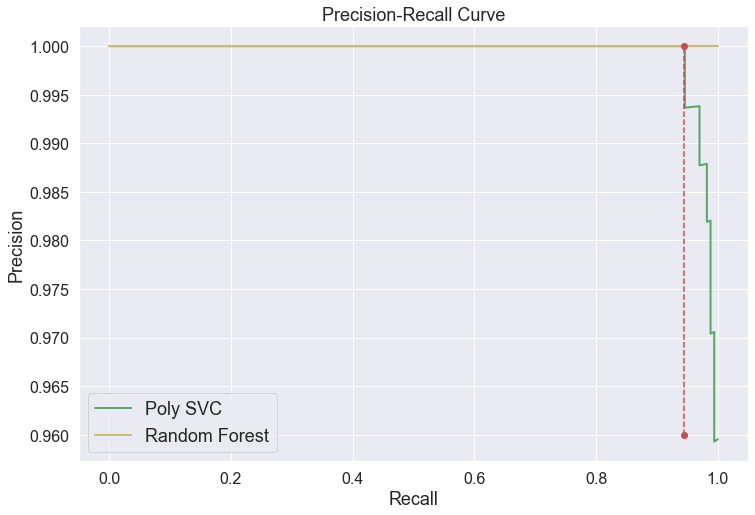

<Figure size 432x288 with 0 Axes>

In [16]:
from sklearn.metrics import precision_recall_curve

rand_forest_gscv_y_decision_scores = rand_forest_gscv.predict_proba(X_train)
poly_svc_gscv_y_decision_scores = poly_svc_gscv.predict_proba(X_train)

poly_svc_gscv_precision, poly_svc_gscv_recall, poly_svc_gscv_thresholds = precision_recall_curve(y_train, poly_svc_gscv_y_decision_scores[:, 1])
rand_forest_gscv_precision, rand_forest_gscv_recall, rand_forest_gscv_thresholds = precision_recall_curve(y_train, rand_forest_gscv_y_decision_scores[:, 1])

def precision_recall_curve(precision_1, recall_1, precision_2, recall_2, clf_name, clf2_name):
    plt.figure(figsize=(12, 8)); plt.rc("xtick", labelsize=16); plt.rc("ytick", labelsize=16)
    plt.plot(recall_1, precision_1, "g-", linewidth=2, label=clf_name)
    plt.plot(recall_2, precision_2, "y-", linewidth=2, label=clf2_name)
    plt.title("Precision-Recall Curve", fontsize=18)
    plt.xlabel("Recall", fontsize=18)
    plt.ylabel("Precision", fontsize=18)
    plt.legend(fontsize=18)
    plt.plot([0.945, 0.945], [0.96, 1], "r--o")
    plt.figure()

precision_recall_curve(poly_svc_gscv_precision, poly_svc_gscv_recall, 
                       rand_forest_gscv_precision, rand_forest_gscv_recall,
                       "Poly SVC", "Random Forest")

The precision-recall curves are not as interesting since the models already perform so well. However, it nicely illustrates the precision-recall trade-off. In the case of the Poly SVC model, the training precision and recall scores are as follows:

Precision Score: 0.9593023255813954
Recall Score: 0.9939759036144579

If we wanted to increase precision to 1.0, the recall would drop to ~0.945 as shown by the red-dotted line in the plot. Note this is not desired for the inhibitor activity classifier as we want to maximize recall. 

Let's next generate Receiver Operating Characteristic (ROC) curves.

Poly SVC ROC AUC Score: 0.9985260189694949
Random Forest ROC AUC Score: 1.0


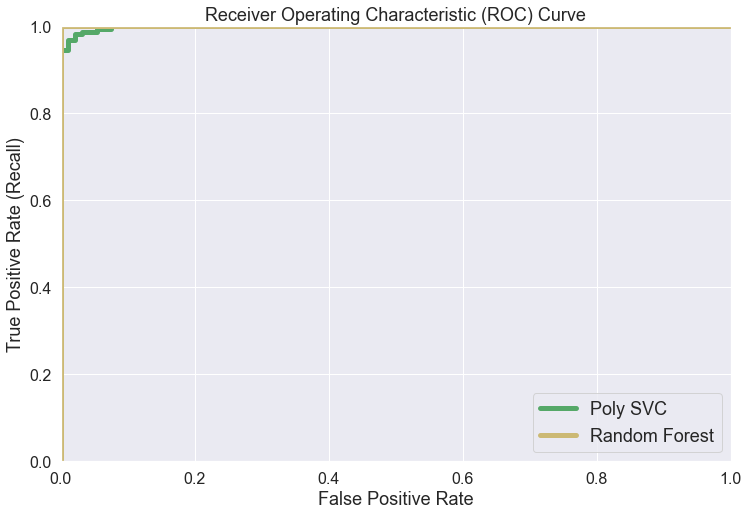

<Figure size 432x288 with 0 Axes>

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

poly_svc_gscv_y_decision_scores = poly_svc_gscv.predict_proba(X_train)
rand_forest_gscv_y_decision_scores = rand_forest_gscv.predict_proba(X_train)

poly_svc_gscv_false_pos_rates, poly_svc_gscv_true_pos_rates, poly_svc_gscv_thresholds = roc_curve(y_train, poly_svc_gscv_y_decision_scores[:, 1])
rand_forest_gscv_false_pos_rates, rand_forest_gscv_true_pos_rates, rand_forest_gscv_thresholds = roc_curve(y_train, rand_forest_gscv_y_decision_scores[:, 1])

def roc_curve(false_pos_rates_1, true_pos_rates_1, false_pos_rates_2, true_pos_rates_2, clf_name, clf2_name):
    plt.figure(figsize=(12, 8)); plt.rc("xtick", labelsize=16); plt.rc("ytick", labelsize=16)
    plt.plot(false_pos_rates_1, true_pos_rates_1, "g-", linewidth=5, label=clf_name)
    plt.plot(false_pos_rates_2, true_pos_rates_2, "y-", linewidth=5, label=clf2_name)
    plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=18)
    plt.xlabel("False Positive Rate", fontsize=18)
    plt.ylabel("True Positive Rate (Recall)", fontsize=18)
    plt.legend(fontsize=18, loc="lower right")
    plt.axis([0, 1, 0, 1]) 
    plt.figure()
    
roc_curve(poly_svc_gscv_false_pos_rates, poly_svc_gscv_true_pos_rates, 
          rand_forest_gscv_false_pos_rates, rand_forest_gscv_true_pos_rates, 
          "Poly SVC", "Random Forest")
print(f"Poly SVC ROC AUC Score: {roc_auc_score(y_train, poly_svc_gscv_y_decision_scores[:, 1])}")
print(f"Random Forest ROC AUC Score: {roc_auc_score(y_train, rand_forest_gscv_y_decision_scores[:, 1])}")

Once again the ROC curves are not as interesting since the models perform so well. The perfect classifier would be to the top left of the plot which is achieved by the Random Forest model. "Perfect" here is defined by the performance on the train set. As we observed previously, the Random Forest model does not generalize as well and its performance is certainly not perfect on the test set. Nonetheless, both models perform well and is quantitatively demonstrated by their Area Under Curve (AUC) scores which are close to 1.0. Based on the scores alone, the Random Forest model is better than the Poly SVC model but again, as we observed earlier, it does not generalize as well.

Finally, we re-visit the Poly SVC as this is model we choose to deploy. It possesses the best cross-validation accuracy, the best generalization performance, and has excellent recall and precision on the test set. These metrics are displayed one final time in the cell block below.

In [18]:
# contruct a DataFrame to compare all 3 models' performance following hyperparameter fine-tuning
fine_tuned_performance_df = pd.DataFrame({"Model": ["SVC Poly Kernel"],
                                          "Fine-Tuned Train Acc.": [poly_svc_gscv.best_score_],
                                          "Fine-Tuned Test Acc.": [poly_svc_gscv_test_score],
                                          "Fine-Tuned Test Error": 
                                          f"{round((((poly_svc_gscv.best_score_-poly_svc_gscv_test_score))/poly_svc_gscv.best_score_*100),2)}%"})
                                
print(fine_tuned_performance_df.to_string(index=False))

print(f"\nFine-Tuned Poly SVC X_train Confusion Matrix: \n {confusion_matrix(y_train, poly_svc_gscv_y_train_pred)}")
print(f"Train Set Precision Score: {precision_score(y_train, poly_svc_gscv_y_train_pred)}")
print(f"Train set Recall Score: {recall_score(y_train, poly_svc_gscv_y_train_pred)}\n")

print(f"Fine-Tuned Poly SVC X_test Confusion Matrix: \n {confusion_matrix(y_test, poly_svc_gscv_y_test_pred)}")
print(f"Test Precision Score: {precision_score(y_test, poly_svc_gscv_y_test_pred)}")
print(f"Test Recall Score: {recall_score(y_test, poly_svc_gscv_y_test_pred)}\n")


           Model  Fine-Tuned Train Acc.  Fine-Tuned Test Acc. Fine-Tuned Test Error
 SVC Poly Kernel               0.938462              0.938462                  0.0%

Fine-Tuned Poly SVC X_train Confusion Matrix: 
 [[ 87   7]
 [  1 165]]
Train Set Precision Score: 0.9593023255813954
Train set Recall Score: 0.9939759036144579

Fine-Tuned Poly SVC X_test Confusion Matrix: 
 [[25  3]
 [ 1 36]]
Test Precision Score: 0.9230769230769231
Test Recall Score: 0.972972972972973

